<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Predictive Model for Real Estate Price Prediction </b></div>

<h3 align="left"><font color=purple> Project Objective:</font></h3><br>

* The aim of this project is to <b>train a Machine Learning Model</b> which can predict the <b>House Sale Price</b> using various relevant features.<br>
* This project is completely based for <b>House Prices - Advanced Regression Techniques</b> Kaggle Competition.<br>
* With <b>79 explanatory variables</b> describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges us to predict the final price of each home.<br>

<h3 align="left"><font color=purple> Business Understanding:</font></h3><br> 
 
1. In the dynamic real estate market, the significance of <b>accurate house price predictions</b> is increasing significantly, as they have the potential to empower homeowners, buyers, and real estate professionals by providing valuable insights into property values and facilitating informed decision-making.

    
2. As a result, the <b>real estate industry faces the crucial task of determining the appropriate pricing for houses</b> before listing them on the market. This is achieved through a comprehensive analysis of various property attributes such as location, size, amenities, condition, market trends, and more.

    
3. Analyzing <b>house attributes to determine pricing</b> helps the real estate industry strike a balance between fair market value for sellers and affordability for buyers. It ensures that house prices align with their unique characteristics, desirability, and overall value proposition. This approach also fosters <b>transparency and facilitates fair competition</b> among properties, allowing buyers to make well-informed decisions based on their specific needs, preferences, and budget constraints. Moreover, accurate house price predictions enable homeowners to assess their property's worth and make informed choices regarding selling, refinancing, or investment opportunities.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Importing Libraries </b></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max.columns",None)

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor

from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Loading the Data </b></div>

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### Shape of the dataset

In [4]:
print(f"Train dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns")
print(f"Test dataset has {test_df.shape[0]} rows and {test_df.shape[1]} columns")

Train dataset has 1460 rows and 81 columns
Test dataset has 1459 rows and 80 columns


### Basic info

In [5]:
train_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* There are **81 columns** and **1460 rows**
* Out of **81 columns**, **43 are categorical** and **38 are numerical**

### Descriptive Statistics

In [6]:
train_df.describe(include = "object")

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq        1141     1434         515         504        445       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Most of the features have **low cardinality**.
* While only a few features have **high cardinality** **`(Neighborhood,Exterior1st,Exterior2nd)`**. The high cardinality features will be managed further by applying encoding techniques

In [7]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Numerical Features like LotArea, BsmtFinSF1,BsmtUnfSF, TotalBsmtSF,GrLivArea and even the target feature SalePrice is having very high deviation values which can lead to bias, Overfitting, and can affect the accuracy of the model
* Proper data preprocessing techniques, such as scaling, transforming, or handling outliers, can help mitigate the effects of high deviation in these columns

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Data Preprocessing </b></div>

In [8]:
train_df.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
873  874          40       RL         60.0    12144   Pave   NaN      Reg   
190  191          70       RL         70.0    10570   Pave   NaN      Reg   
476  477          20       RL         75.0    13125   Pave   NaN      Reg   
998  999          30       RM         60.0     9786   Pave   NaN      Reg   
2      3          60       RL         68.0    11250   Pave   NaN      IR1   
658  659          50       RL         78.0    17503   Pave   NaN      Reg   
292  293          50       RL         60.0    11409   Pave   NaN      Reg   
614  615         180       RM         21.0     1491   Pave   NaN      Reg   
250  251          30       RL         55.0     5350   Pave   NaN      IR1   
11    12          60       RL         85.0    11924   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
873         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
190         Bnk    AllPub    Inside       Mod      Crawfor       Norm   
476         Lvl    AllPub    Inside       Mod      CollgCr       Norm   
998         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
2           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
658         Lvl    AllPub    Inside       Gtl        NAmes     Artery   
292         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
614         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
250         Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
11          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
873       Norm     1Fam     1Story            5            7       1949   
190       Norm     1Fam     2Story            8            8       1932   
476       Norm     1Fam     1Story            6            5       1997   
998       Norm     1Fam     1Story            3            4       1922   
2         Norm     1Fam     2Story            7            5       2001   
658       Norm     1Fam     1.5Fin            6            5       1948   
292       Norm     1Fam     1.5Fin            5            4       1949   
614       Norm   TwnhsE     SFoyer            4            6       1972   
250       Norm     1Fam     1Story            3            2       1940   
11        Norm     1Fam     2Story            9            5       2005   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
873          1950     Gable  CompShg     HdBoard     HdBoard        NaN   
190          1994       Hip  CompShg     BrkFace     BrkFace        NaN   
476          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
998          1950       Hip  CompShg     Wd Sdng     Wd Sdng        NaN   
2            2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
658          1950     Gable  CompShg     VinylSd     VinylSd        NaN   
292          2008     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   
614          1972     Gable  CompShg     CemntBd     CmentBd        NaN   
250          1966     Gable  CompShg     Wd Sdng     Plywood        NaN   
11           2006       Hip  CompShg     WdShing     Wd Shng      Stone   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
873         0.0        Gd        TA     CBlock       TA       TA           No   
190         0.0        Gd        TA     CBlock       Gd       Gd           No   
476       215.0        TA        TA      PConc       Gd       TA           Gd   
998         0.0        TA        TA     BrkTil       TA       Fa           No   
2         162.0        Gd        TA      PConc       Gd       TA           Mn   
658         0.0        TA        TA     CBlock       TA       TA           No   
292         0.0        TA        TA     CBlock       TA       TA           No   
614         0.0        TA        TA     CBlock       G

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Dropping **`Id column`** snce it doesnt seem to be relevant for our further analysis 

In [9]:
test_id = test_df["Id"]
train_df.drop(columns = 'Id', inplace = True)
test_df.drop(columns = 'Id', inplace = True)

### Null values

In [10]:
null_df = round(train_df.isnull().sum()/len(train_df) *100,2).sort_values().to_frame().rename(columns={0: "Train % of Missing Values"})
null_df['Test % of Missing Values'] = round(test_df.isnull().sum()/len(train_df) *100,2)

In [11]:
null_df[(null_df['Train % of Missing Values'] > 45) | (null_df['Test % of Missing Values'] > 45)]

Train % of Missing Values  Test % of Missing Values
FireplaceQu                      47.26                     50.00
MasVnrType                       59.73                     61.23
Fence                            80.75                     80.07
Alley                            93.77                     92.60
MiscFeature                      96.30                     96.44
PoolQC                           99.52                     99.73

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Features like **`PoolQC, MiscFeature, Alley, Fence`** are having more no of missing values.
* Its better to **drop those features** because Data Imputaion in those features can lead to **bias & noise** further causing the model to be overfitting. **Lets drop those features**

##### Dropping those features

In [12]:
cols = ["FireplaceQu","Fence","Alley","MiscFeature","PoolQC"]

train_df.drop(columns=cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

### Combining both train and test data 

In [13]:
target = train_df[["SalePrice"]].reset_index(drop=True)

train_df.drop(columns=["SalePrice"],inplace=True)

df = pd.concat([train_df,test_df]).reset_index(drop=True)

In [14]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd          

In [15]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 2919 rows and 74 columns


### Missing Values

In [16]:
null_df = df.isnull().sum()[df.isnull().sum()>0].sort_values().to_frame().rename(columns={0:"Total Missing values"})
null_df["% of Missing Values"] = round(null_df["Total Missing values"]/len(df)*100,2)
null_df["Feature Data Type"] = df[null_df.index.tolist()].dtypes

In [17]:
null_df

Total Missing values  % of Missing Values Feature Data Type
BsmtUnfSF                        1                 0.03           float64
GarageArea                       1                 0.03           float64
GarageCars                       1                 0.03           float64
KitchenQual                      1                 0.03            object
Electrical                       1                 0.03            object
TotalBsmtSF                      1                 0.03           float64
BsmtFinSF2                       1                 0.03           float64
BsmtFinSF1                       1                 0.03           float64
SaleType                         1                 0.03            object
Exterior1st                      1                 0.03            object
Exterior2nd                      1                 0.03            object
BsmtHalfBath                     2                 0.07           float64
Utilities                        2                 0.07            object
Functional                       2                 0.07            object
BsmtFullBath                     2                 0.07           float64
MSZoning                         4                 0.14            object
MasVnrArea                      23                 0.79           float64
BsmtFinType1                    79                 2.71            object
BsmtFinType2                    80                 2.74            object
BsmtQual                        81                 2.77            object
BsmtCond                        82                 2.81            object
BsmtExposure                    82                 2.81            object
GarageType                     157                 5.38            object
GarageCond                     159                 5.45            object
GarageYrBlt                    159                 5.45           float64
GarageFinish                   159                 5.45            object
GarageQual                     159                 5.45            object
LotFrontage                    486                16.65           float64
MasVnrType                    1766                60.50            object

In [18]:
len(null_df)

29

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Total **29 columns** are having missing values.
* We will fill missing values by some techniques sepearetly for numerical and categorical columns

### Filling Missing Values in features related to Garage & Basement

In [19]:
df.columns[df.isnull().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [20]:
df['GarageFinish'].value_counts()

GarageFinish
Unf    1230
RFn     811
Fin     719
Name: count, dtype: int64

In [21]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df[col] = df[col].fillna(0)

for col in ['GarageType', 'GarageFinish']:
    df[col] = df[col].fillna(0)

for col in ['BsmtFinType1', 'BsmtFinType2']:
    df[col] = df[col].fillna(0)

df['BsmtQual'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageCond'].fillna('None', inplace=True)

### Filling Missing Values in Categorical values

In [22]:
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))


In [23]:
cat_cols = ['Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities',
            'Electrical', 'KitchenQual']

imputer = SimpleImputer(strategy = 'most_frequent')
df[cat_cols] = imputer.fit_transform(df[cat_cols])

### Filling Missing values in Numerical columns

In [24]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))
df['MasVnrArea'] = df.groupby('MasVnrType')['MasVnrArea'].transform(lambda x : x.fillna(x.median()))
df['BsmtFinSF1'] = df.groupby('BsmtFinType1')['BsmtFinSF1'].transform(lambda x : x.fillna(x.median()))
df['BsmtFinSF2'] = df.groupby('BsmtFinType2')['BsmtFinSF2'].transform(lambda x : x.fillna(x.median()))

In [25]:
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0.0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0.0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0.0)
df['TotalBsmtSF'] = df['BsmtFinSF1'] +df['BsmtFinSF2'] + df['BsmtUnfSF']

In [26]:
## Dropping MasVnrArea and MasVnrType
df = df.drop(['MasVnrArea', 'MasVnrType'], axis=1)

In [27]:
print("Count of Missing Values :",df.isnull().sum().sum())

Count of Missing Values : 0


### Seperating Train & Test data

In [28]:
df_train = pd.concat([df.iloc[:len(target["SalePrice"]),:],target],axis=1)
df_test = df.iloc[len(target["SalePrice"]):,:]

In [29]:
print(f"Train data has {df_train.shape[0]} rows and {df_train.shape[1]} columns")
print(f"Test data has {df_test.shape[0]} rows and {df_test.shape[1]} columns")

Train data has 1460 rows and 73 columns
Test data has 1459 rows and 72 columns


In [30]:
print(df_train.isnull().sum().sum())
print('-'*50)
print(df_test.isnull().sum().sum())      

0
--------------------------------------------------
0


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> EDA </b></div>

#### Visualizing Target variable (Sale Price)

In [31]:
df_train.SalePrice.describe().to_frame().T

count          mean           std      min       25%       50%  \
SalePrice  1460.0  180921.19589  79442.502883  34900.0  129975.0  163000.0   

                75%       max  
SalePrice  214000.0  755000.0

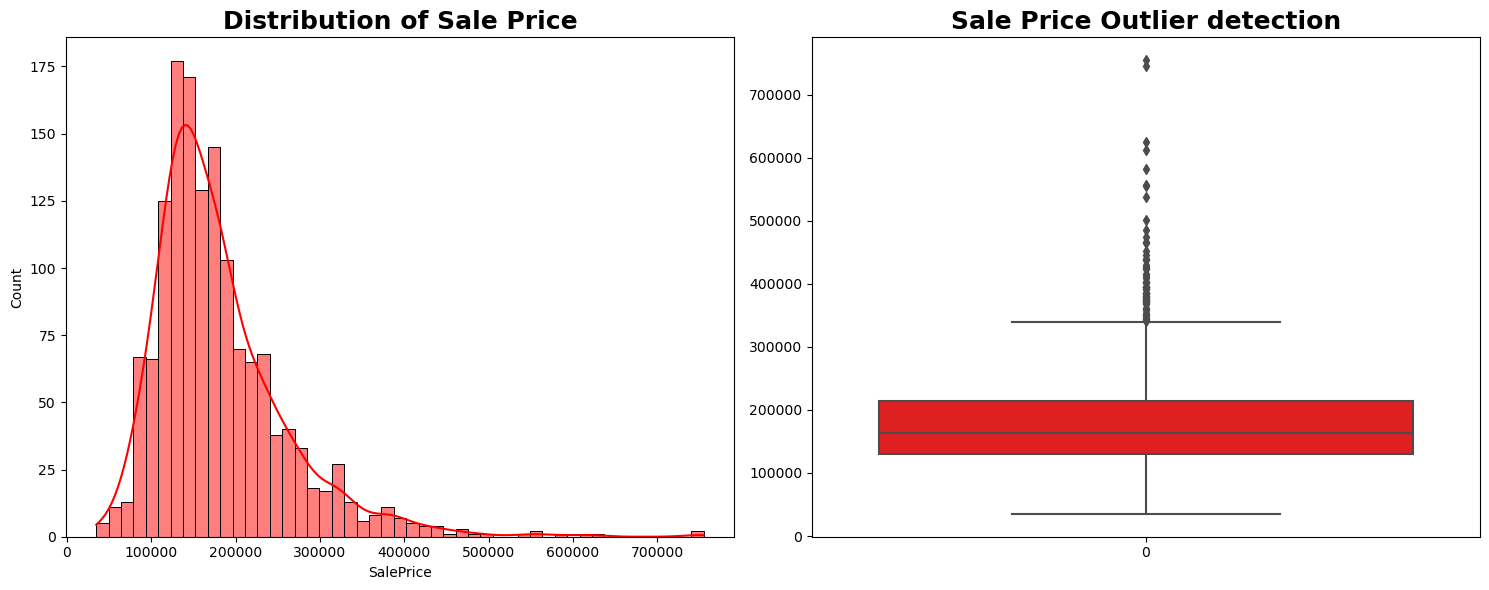

In [32]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.histplot(df_train['SalePrice'], color = 'red', kde = True)
plt.title("Distribution of Sale Price", fontweight = "black",size=18)

plt.subplot(1,2,2)
sns.boxplot(df_train['SalePrice'], color = 'red')
plt.title("Sale Price Outlier detection", fontweight = "black",size=18)
plt.tight_layout()

plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Distribution of Sale Price is **Right skewed**. It means that it has **positive outliers**
* It is not following Normal distribution so before performing regression it has to be transformed
* To achieve the Normal distribution, we can perform different techniques like **Johnsonsu Transformation**, **Norm Transformation** , **Log Normal Transformation**

### Transformation techniques on Sale Price Feature

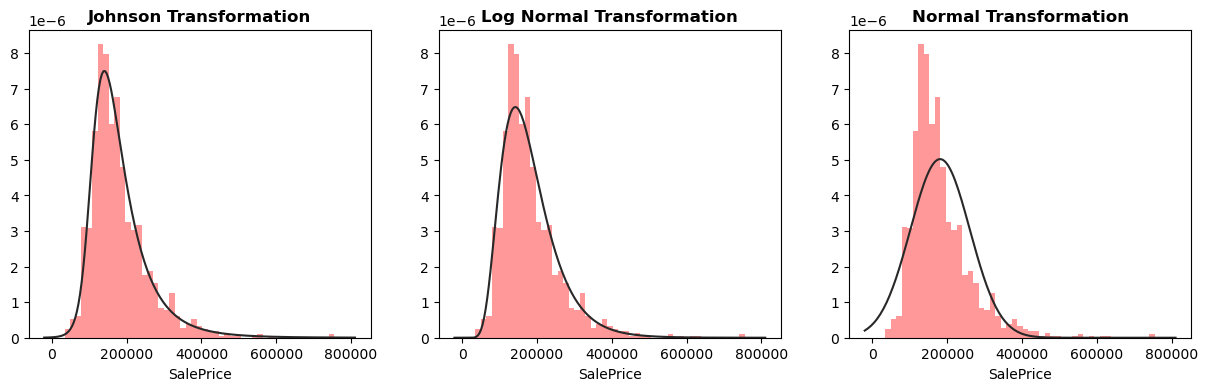

In [33]:
plt.figure(figsize = (15,4))

plt.subplot(1,3,1)
sns.distplot(df_train['SalePrice'], color = 'red', kde = False, fit=stats.johnsonsu)
plt.title("Johnson Transformation", fontweight = 'black')

plt.subplot(1,3,2)
sns.distplot(df_train['SalePrice'], color = 'red', kde = False, fit=stats.lognorm)
plt.title("Log Normal Transformation", fontweight = 'black')

plt.subplot(1,3,3)
sns.distplot(df_train['SalePrice'], color = 'red', kde = False, fit=stats.norm)
plt.title("Normal Transformation", fontweight = 'black')

plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* We see that, **Johnson transformation** is giving the best result followed by **Log Normal Distribution**

### Visualizing Distribution of Continuous Numerical Features

In [34]:
con_cols = ["LotFrontage", "LotArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
           "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF",
           "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]

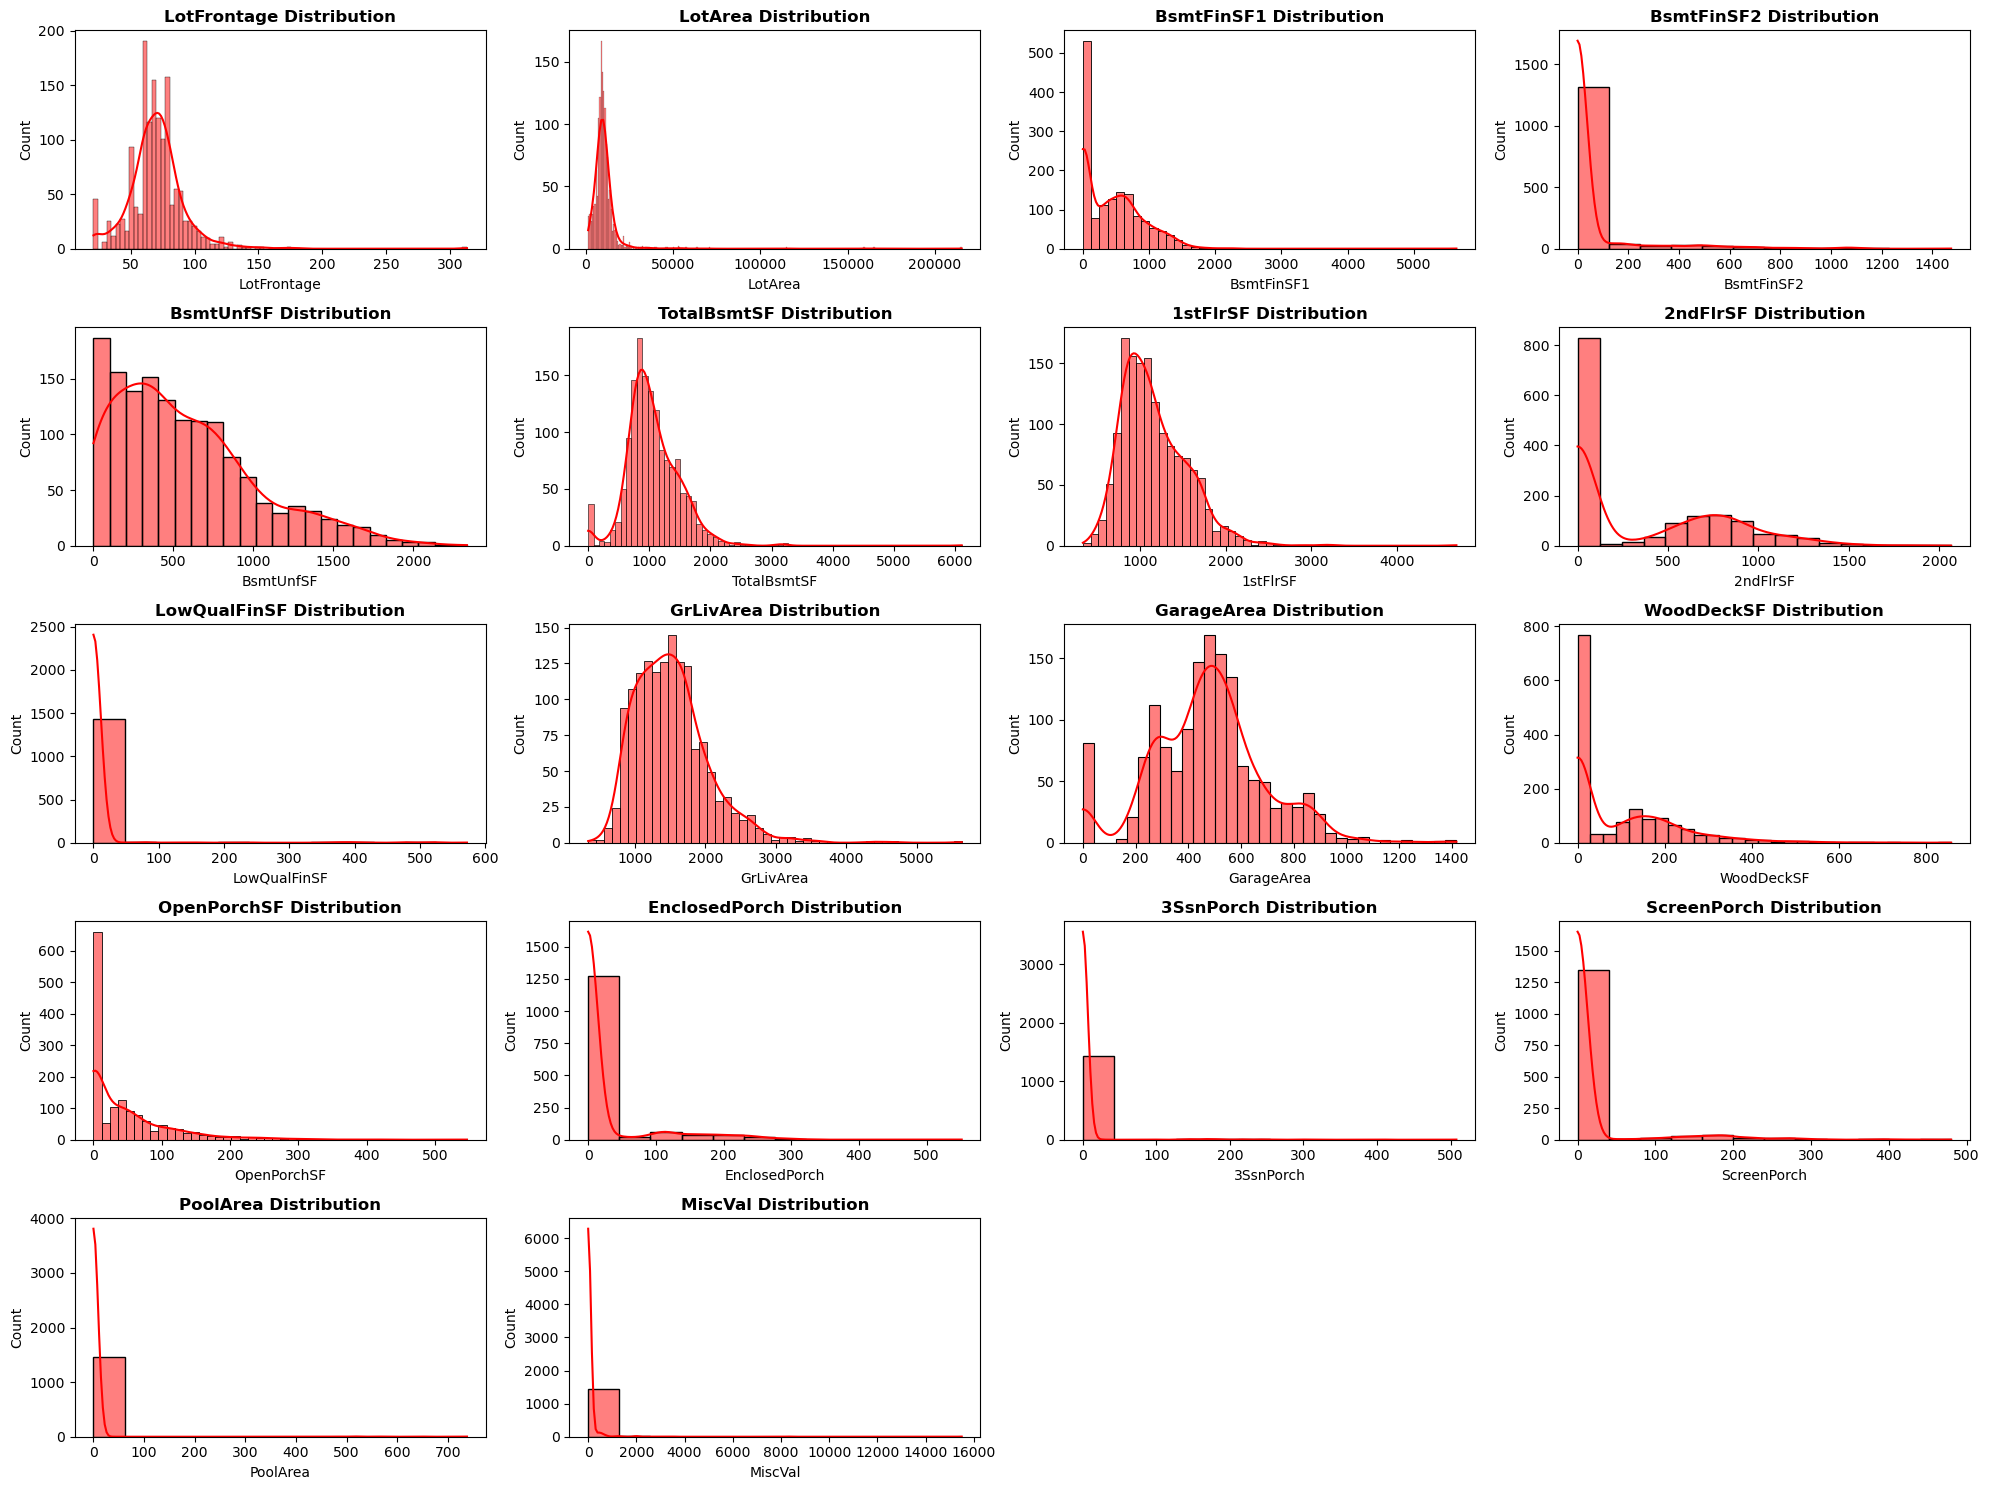

In [35]:
plt.figure(figsize = (20,15))
for index,col in enumerate(con_cols):
    plt.subplot(5,4,index+1)
    sns.histplot(df_train[col], kde = True, color = 'red')
    plt.title(f"{col} Distribution", fontweight = 'black')
    plt.tight_layout()
    
    
    

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* We see that, almost all the features are **right skewed** and not even a single feature has normal distribution
* **Garage Area feature** is having a kind of normal distribution

### Visualizing Skewness of Continuous Numerical features

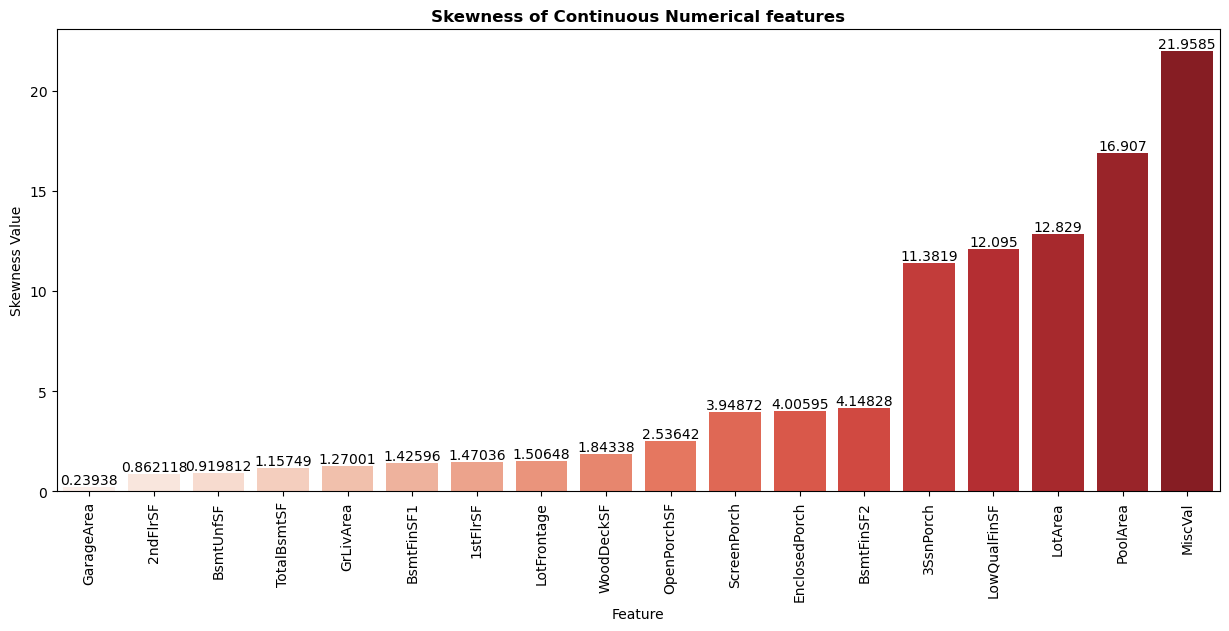

In [36]:
skewness = df[con_cols].skew().sort_values().to_frame().reset_index().rename(columns = {index : 'Name', 0 : 'Skewness Value'})

plt.figure(figsize = (15,6))
ax = sns.barplot(x= 'index', y= 'Skewness Value', data = skewness , palette=sns.color_palette("Reds",19))
plt.xticks(rotation =90)
plt.xlabel('Feature')
plt.title("Skewness of Continuous Numerical features", fontweight = 'black')

for i in ax.containers:
    ax.bar_label(i)
    
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Features like **3SsnPorch, LowQualFinSF, LotArea, PoolArea, MiscVal** are having high skewness which may create complexity to our model
* As we know that skewness should be equal to zero for normal distribution. We can achieve that by applying transformation techniques

### Correlation of Continuous Numerical Features 

In [37]:
con_cols.append("SalePrice")

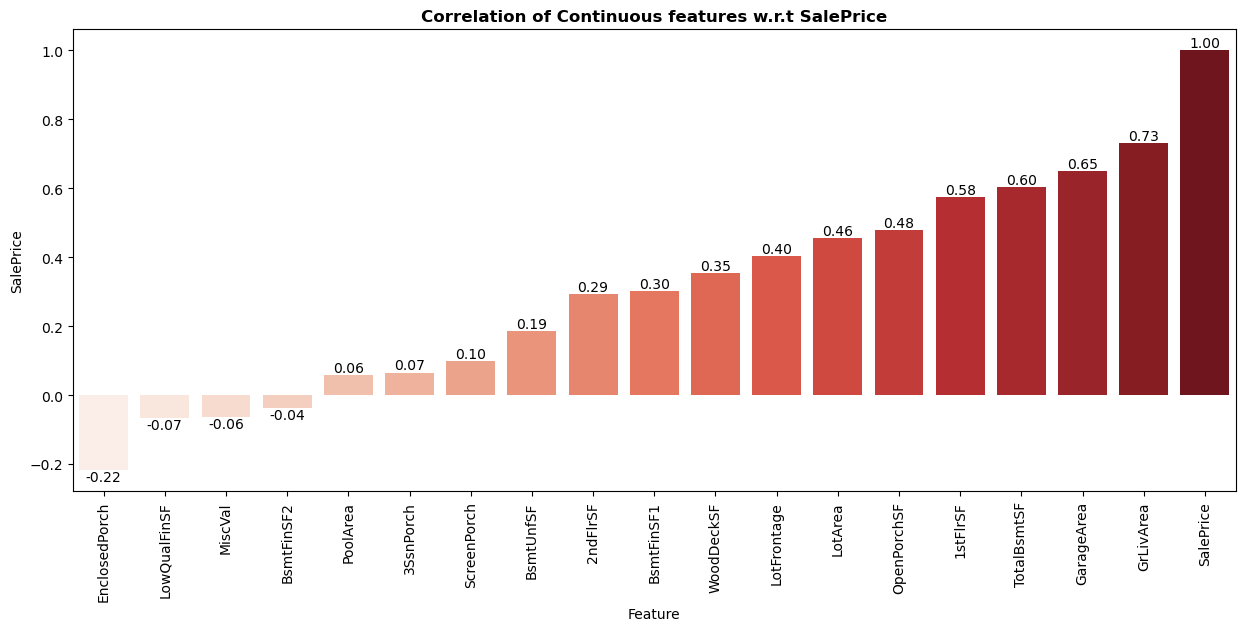

In [38]:
corr = df_train[con_cols].corr(method="spearman")["SalePrice"].sort_values().to_frame().reset_index().rename(columns = {index : 'Feature',
                                                                                                                     })
plt.figure(figsize = (15,6))
ax = sns.barplot(x= 'index', y= 'SalePrice', data = corr , palette=sns.color_palette("Reds",19))
plt.xticks(rotation =90)
plt.xlabel('Feature')
plt.title("Correlation of Continuous features w.r.t SalePrice", fontweight = 'black')

for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')

# for i, v in enumerate(corr):
#     plt.text(i, v, f"{v:.1f}", ha="center", va="bottom",size=15,fontweight="black")
    
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **`TotalBsmtSF, GarageArea, GrLivArea`** are having strong relation with SalePrice
* **`LotFrontage, LotArea, OpenPorchSF, 1stFirSF`** are having moderate relation with SalePrice
* **`BsmtUnfSF, ScreenPorch, 3SsnPorch, PoolArea, BsmtFinSF2, MiscVal, LowQualFinSF`** are having low relation with SalePrice. If require, we can drop these features further 

### Visualizing Categorical features w.r.t SalePrice

In [39]:
cat_cols = df_train.select_dtypes(include = 'object').columns.tolist()

In [40]:
def boxplot(col_list):
    plt.figure(figsize=(18,12))
    for index, col in enumerate(col_list):
        plt.subplot(2,4, index+1)
        sns.boxplot(x = col, y = 'SalePrice', data = df_train)
        plt.title(f"{col} vs SalePrice", fontweight = 'black',size=20)
        plt.xticks(rotation=90)
        plt.tight_layout()

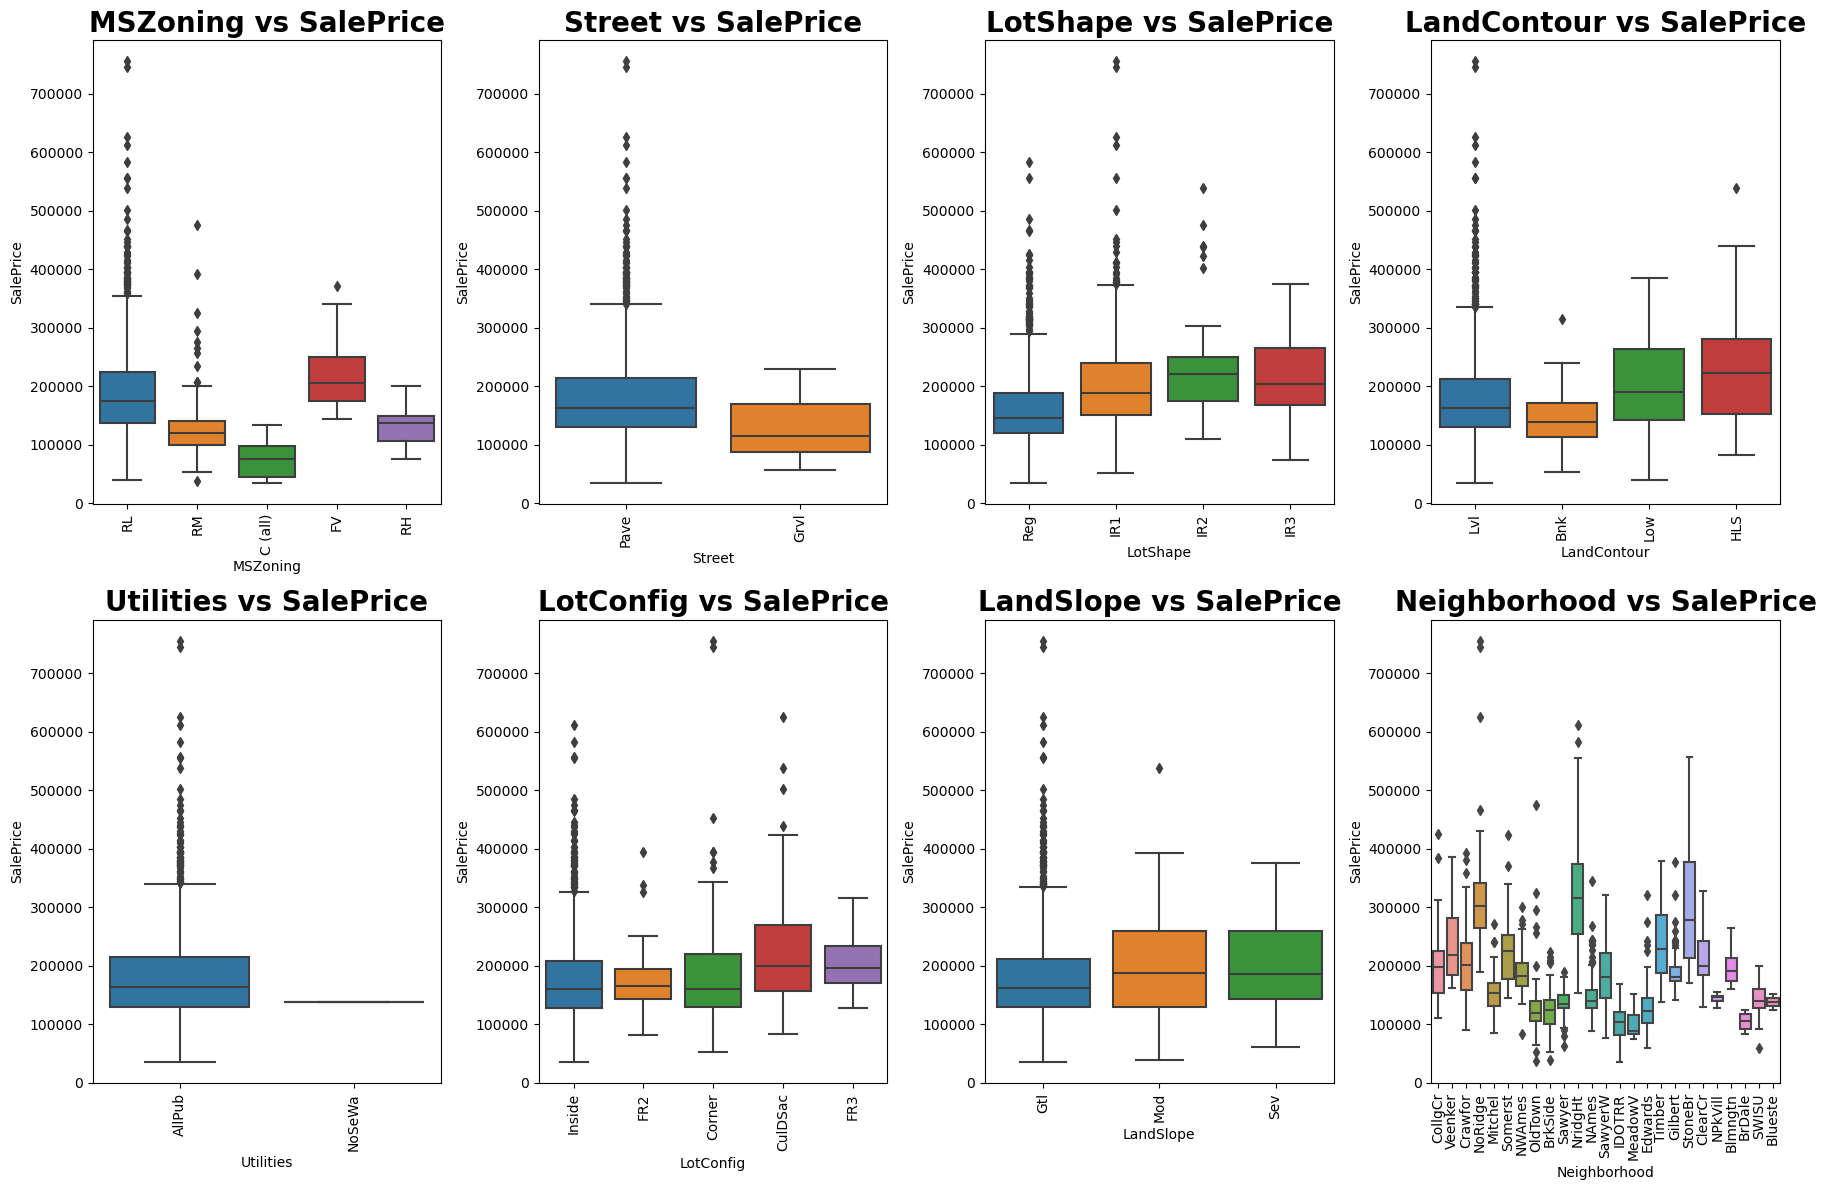

In [41]:
boxplot(cat_cols[0:8])

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Features **Street, Utilities** are having very high class imbalance. Its better to drop those features since it might leads to overfitting, Limited Predictive Power issues
* **Neighborhood feature** has **high cardinality**. So we should perform **Encoding** further

#### Dropping features with high class imbalance

In [42]:
df_train.drop(columns = ['Street', 'Utilities'], inplace = True)
df_test.drop(columns = ['Street', 'Utilities'], inplace = True)

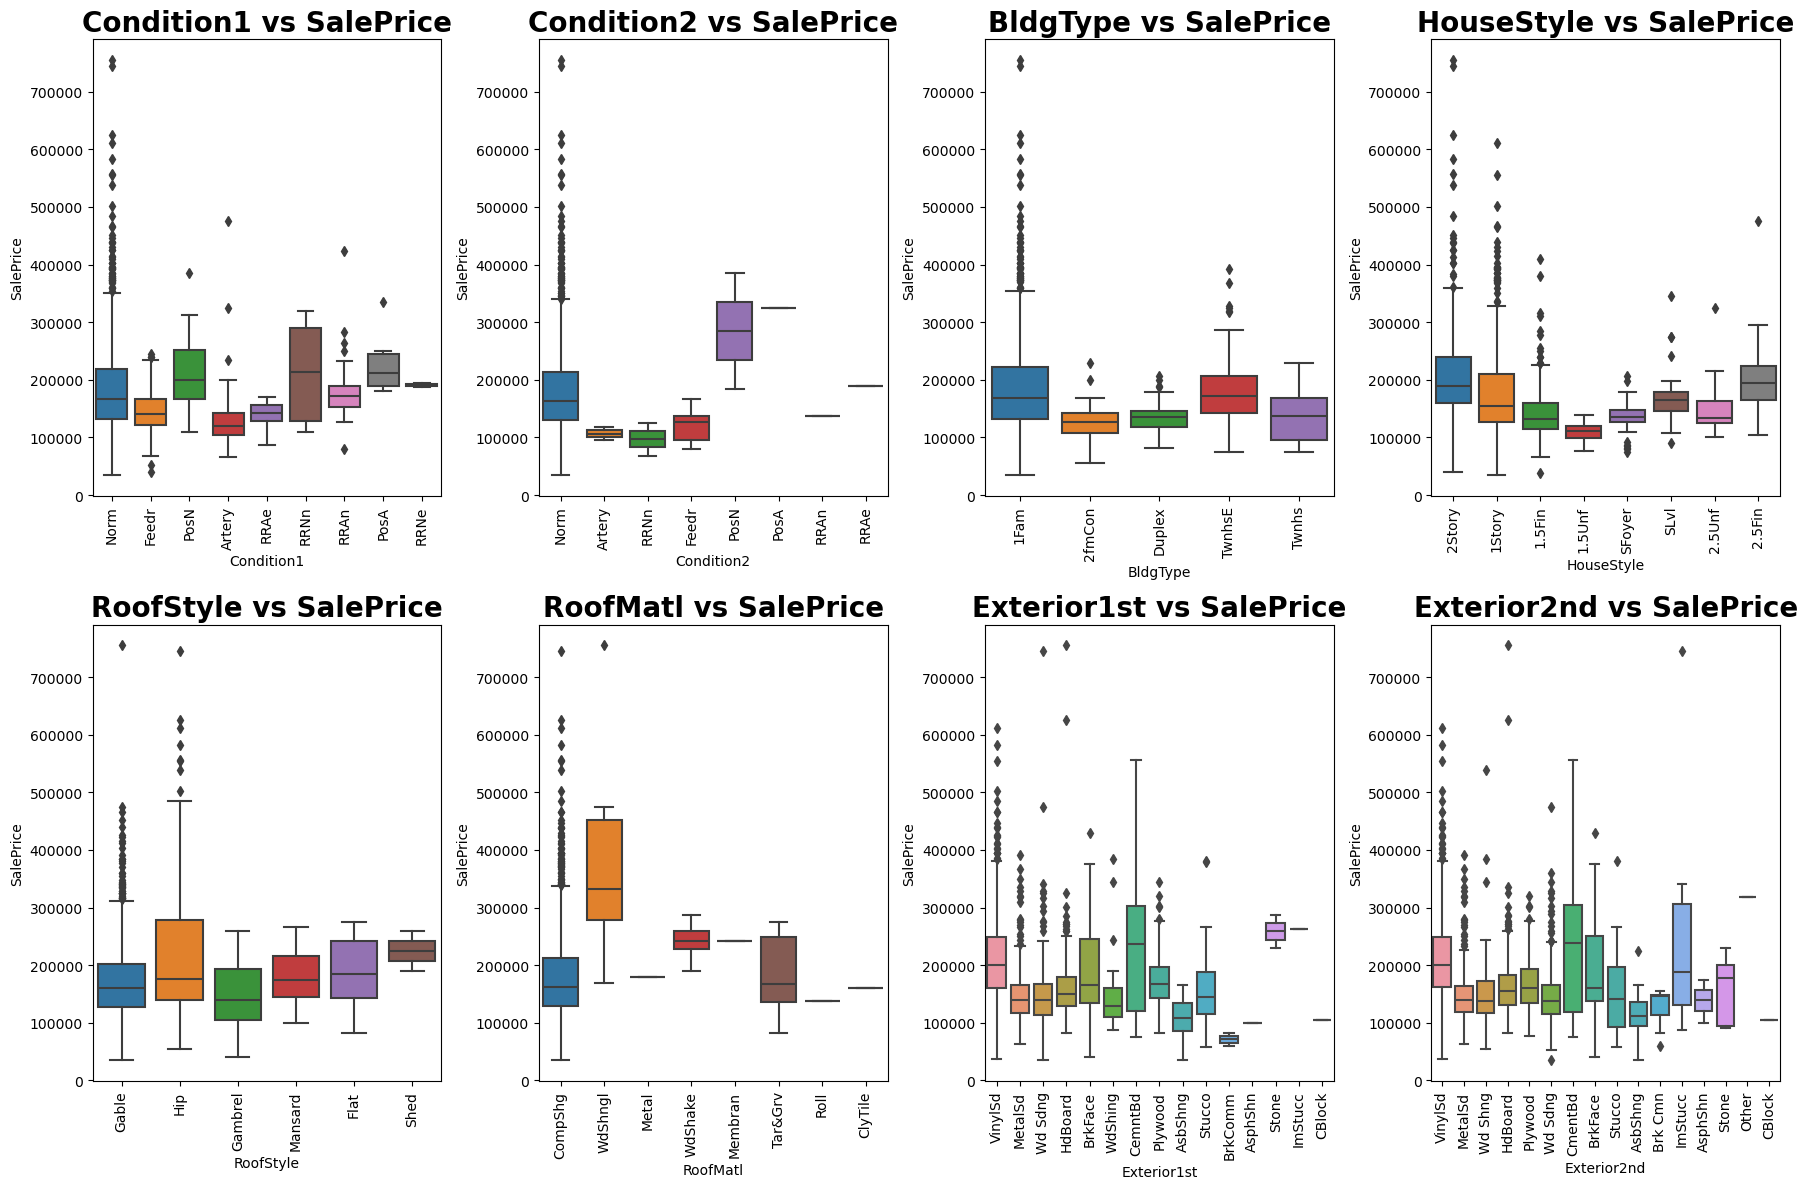

In [43]:
boxplot(cat_cols[8:16])

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Features like **Condition2, RoofMatl** are having high class imbalance. We can drop RoofMatl and will do feature engineering on Condition2 to reduce calss imbalance
* We can see there is **moderate cardinality** presence in **Exterior1st and Exterior2nd** features

#### Dropping the feature with high class imbalance

In [44]:
df_train.drop(columns = ['RoofMatl'], inplace = True)
df_test.drop(columns = ['RoofMatl'], inplace = True)

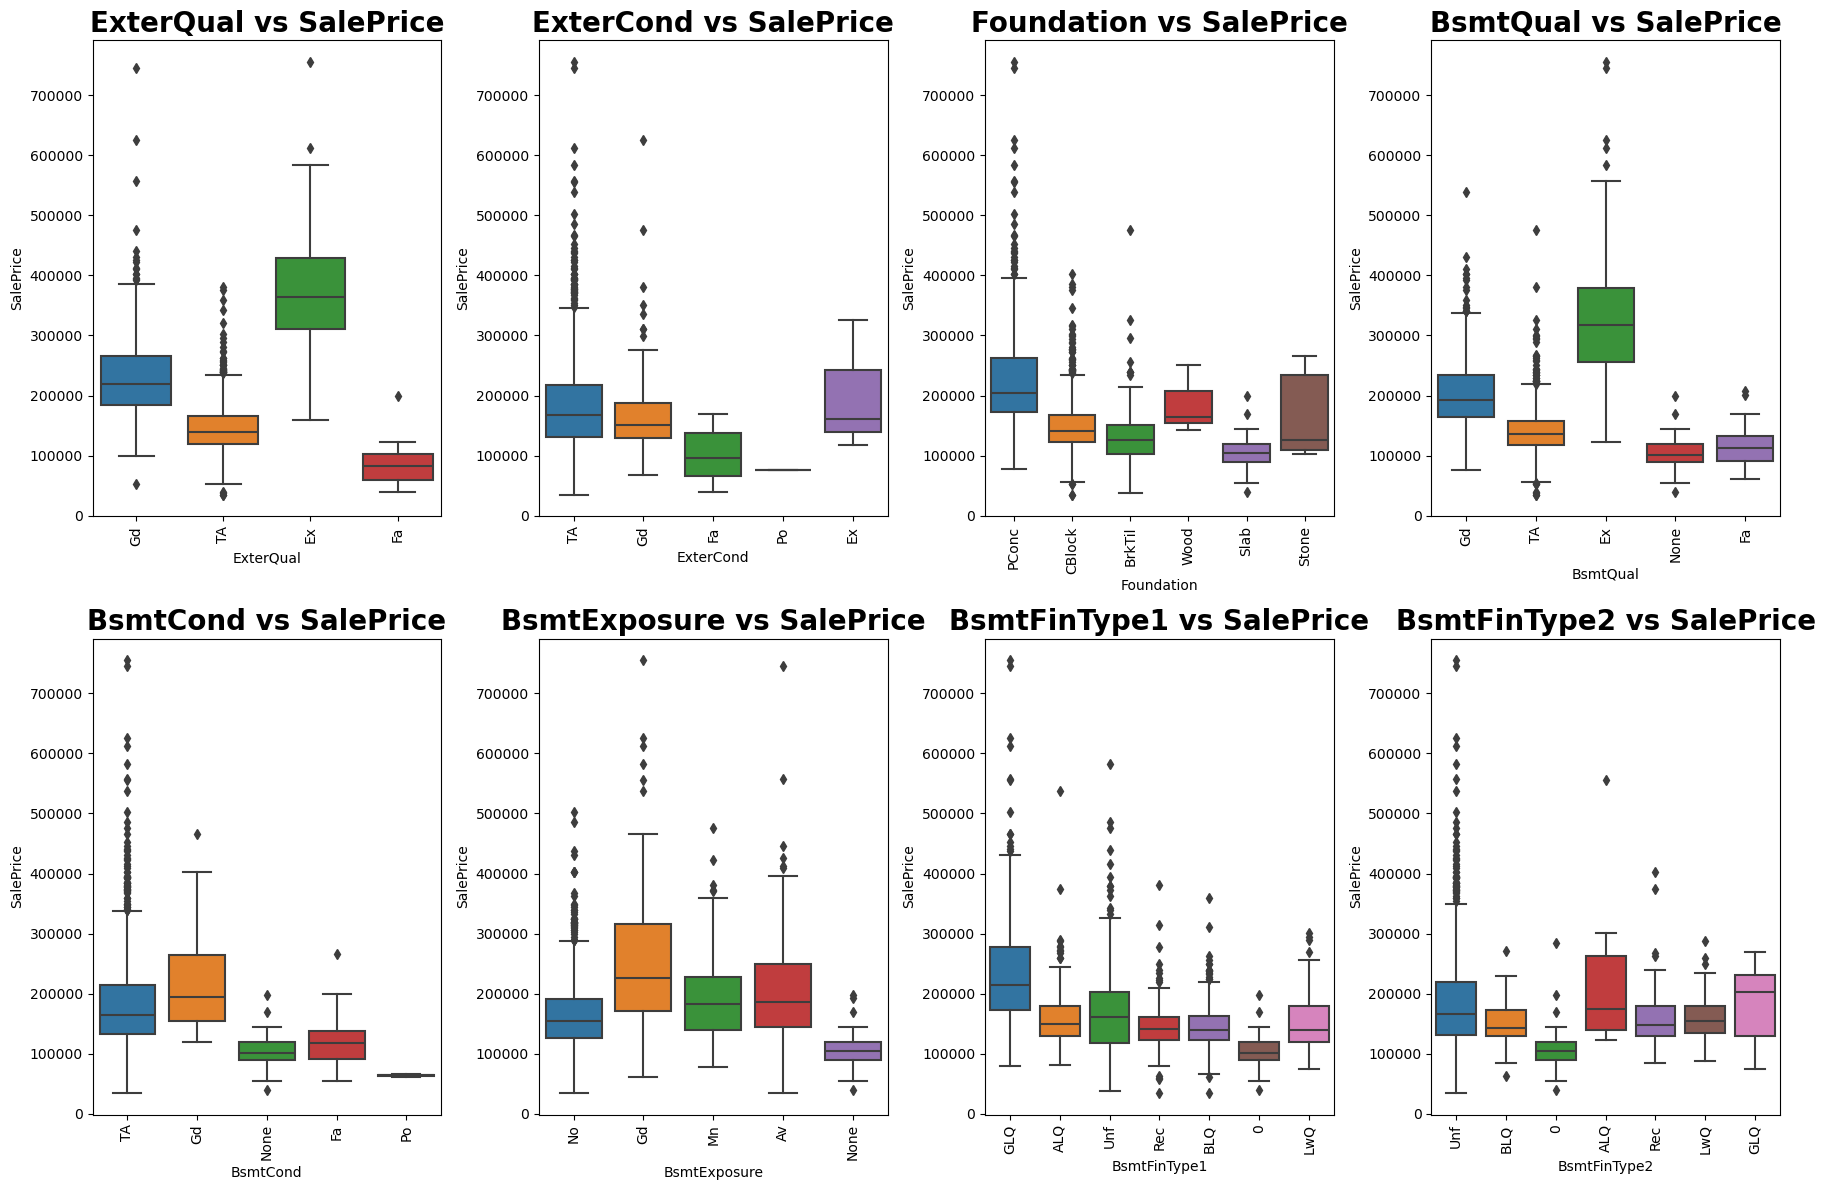

In [45]:
boxplot(cat_cols[16:24])

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* All the features seems to be **important** for prediction
* Further, we should perform **Encoding** to all these features 

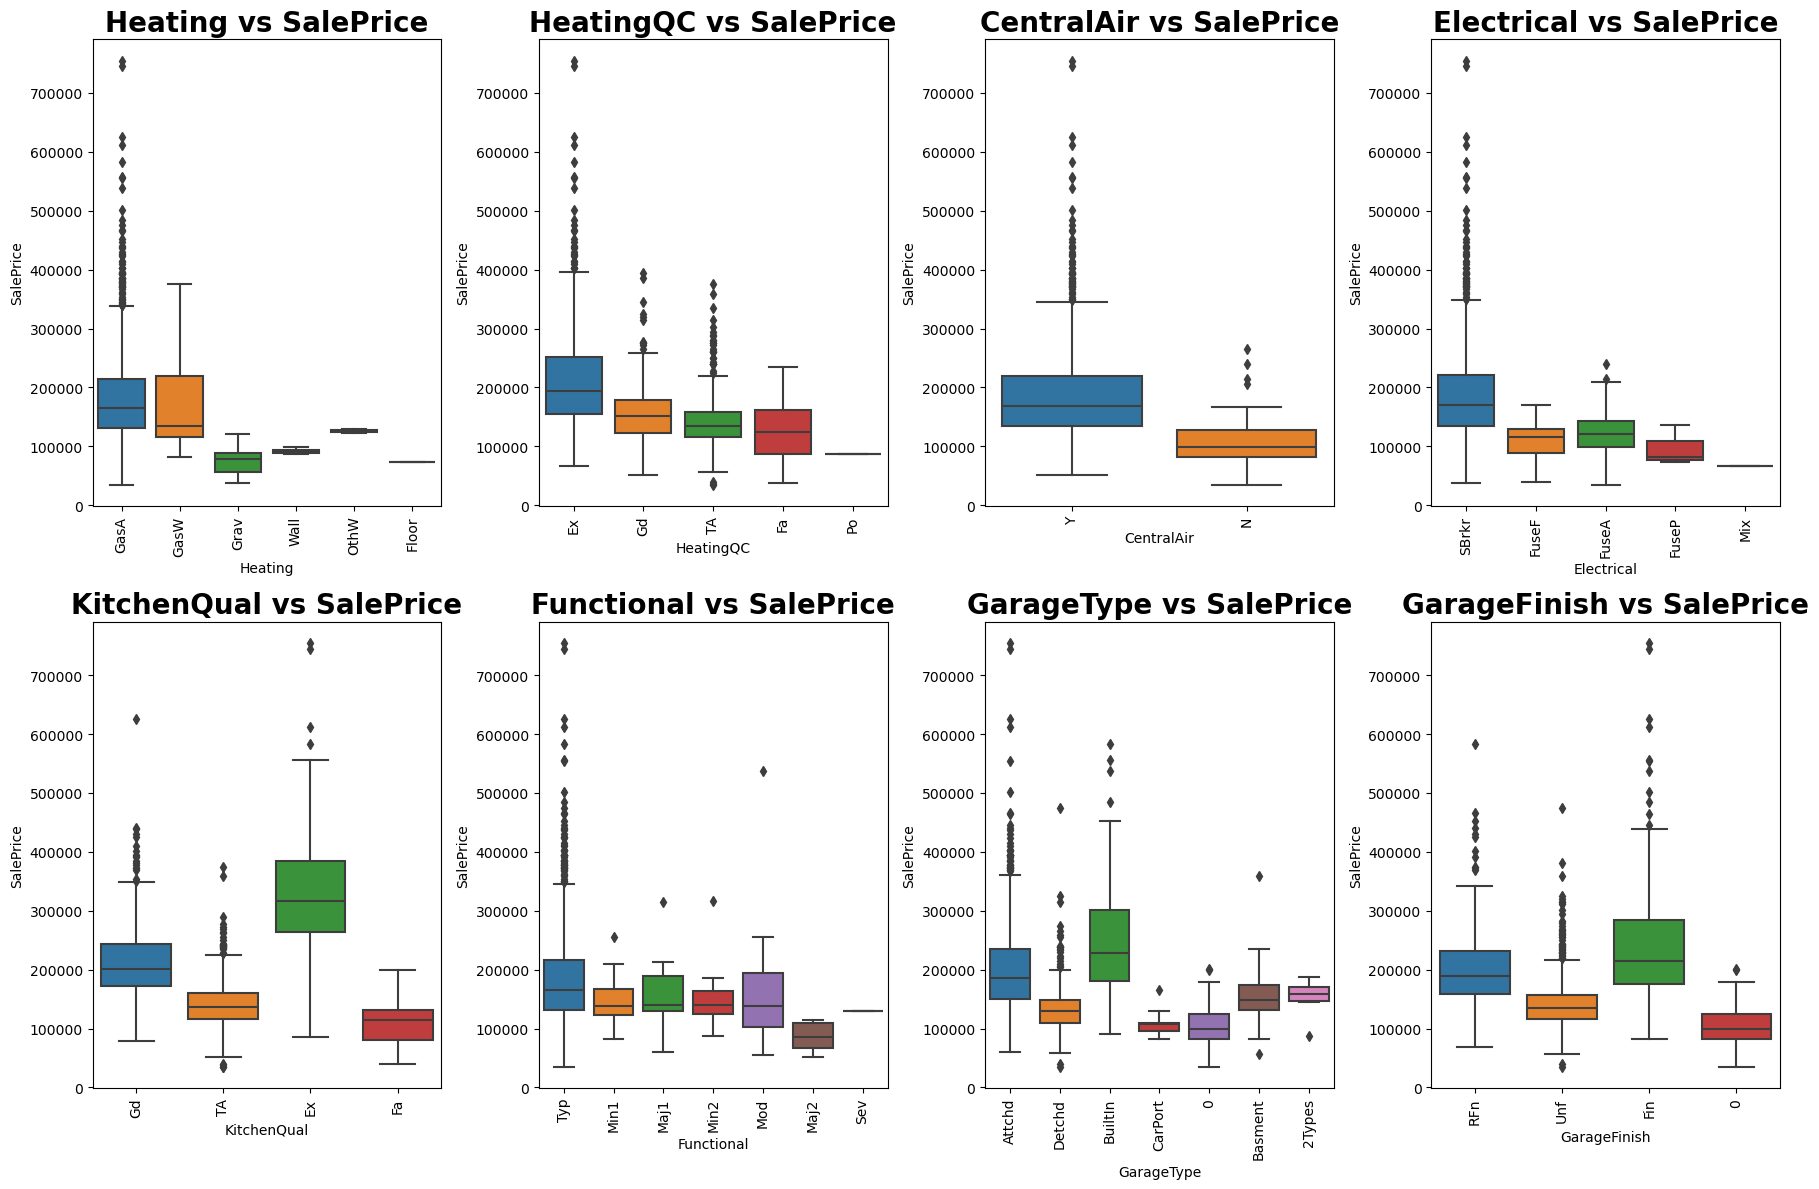

In [46]:
boxplot(cat_cols[24:32])

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Feature **Heating** has very high class imbalance. It is very important feature in real estate because they directly affect the comfort, energy efficiency, and operational costs of a home, which in turn can influence its market value.
* Hence, can perform Feature Engineering inorder to reduce class imbalance
* Rest all other features seems to be very useful for prediction

In [47]:
len(cat_cols)

37

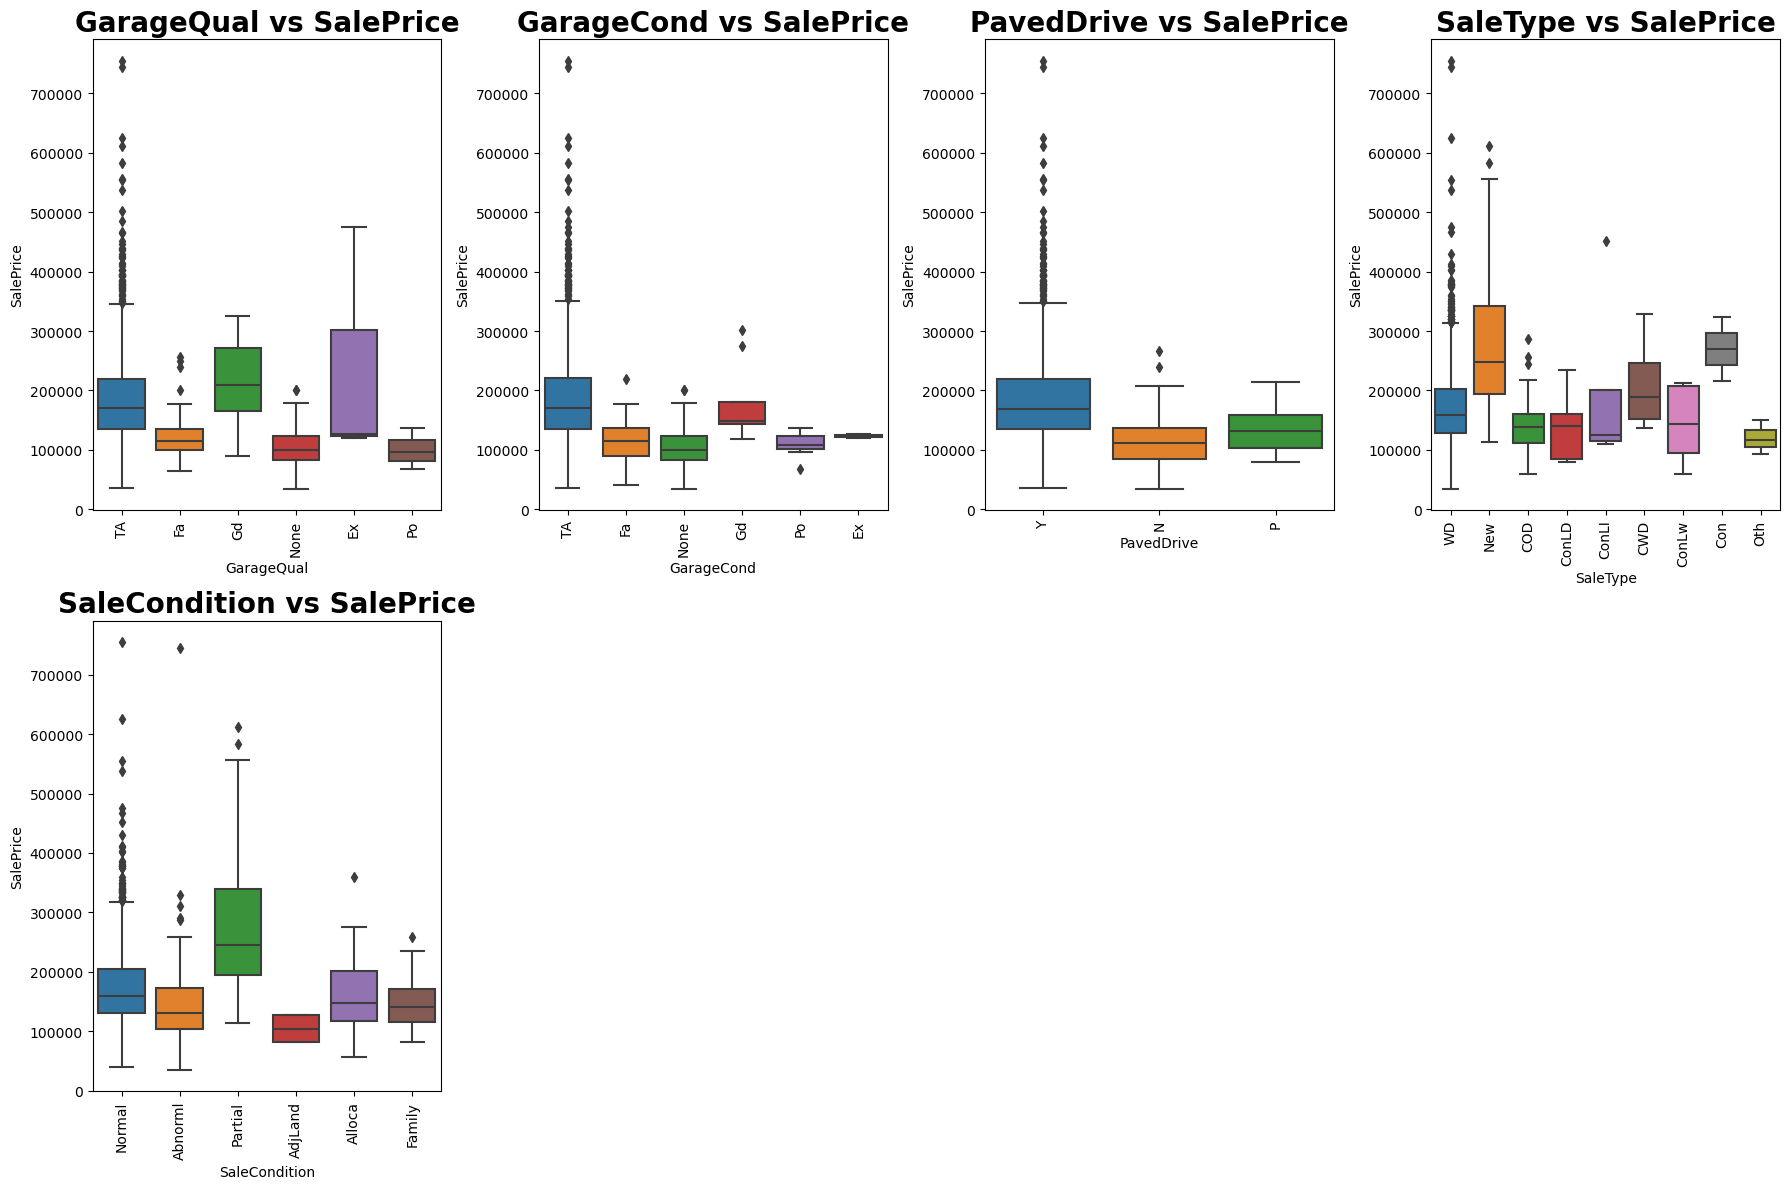

In [48]:
boxplot(cat_cols[32:])

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* All the features seems to be **important** for prediction
* Further, we should perform **Encoding** to all these features 

### Visualizing Discrete Numerical features w.r.t Average SalePrice

In [49]:
dis_cols = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath','FullBath',
           'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
           'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']



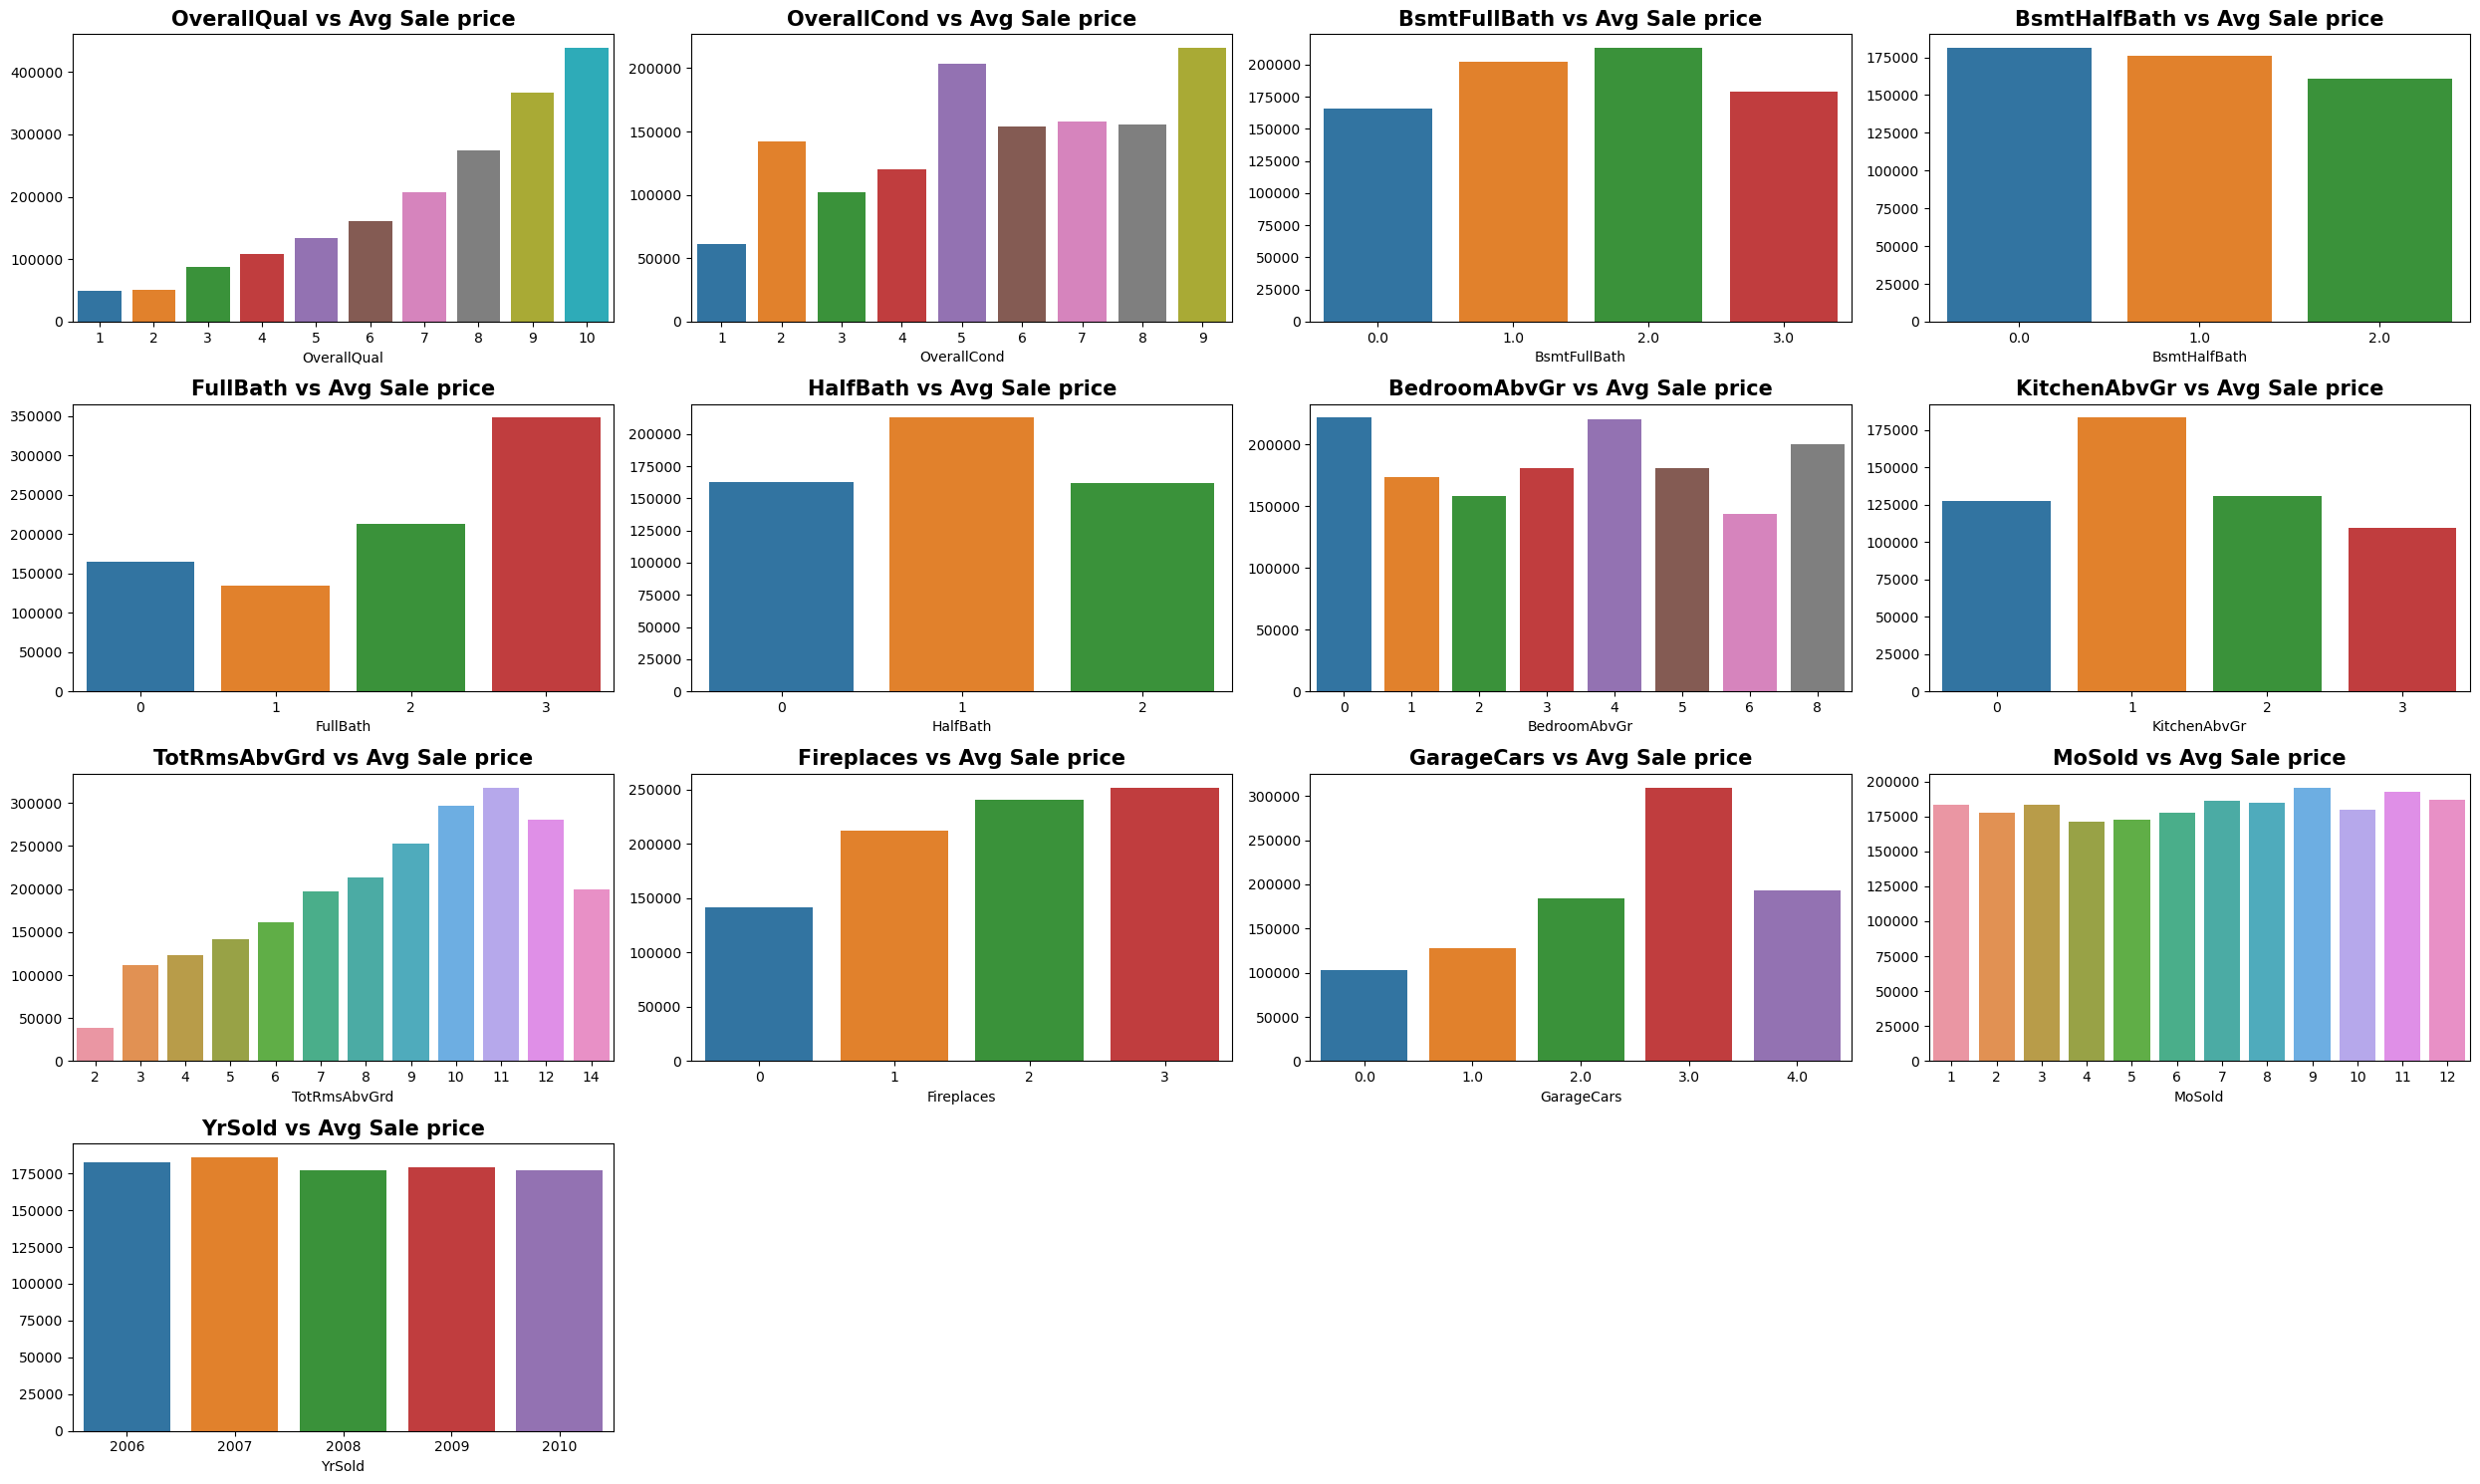

In [50]:
plt.figure(figsize = (25,15))
for index, col in enumerate(dis_cols):
    data = df_train.groupby(col)['SalePrice'].mean()
    plt.subplot(4,4 ,index+1)
    sns.barplot(x = data.index, y = data.values)
    plt.title(f"{col} vs Avg Sale price", fontweight = 'black', size = 15)
    plt.tight_layout()
    

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **OverallQual, FullBath, TotRmsAbvGrd, Fireplaces, GarageCars** are having positive relation with SalePrice
* **KitchenAbvGr** is having negative relation with SalePrice
* All the features seems to be **important** for prediction

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Feature Engineering </b></div>

# **Creating new features**

### Creating a new feature based on Year Built, Renovation & Sold

* **Year Built** - Original Construction year of the house
* **YearRemodAdd** - Year when the house underwent remodeling. If the year is same as year built then no remodeling
* **YrSold** - Year when the house sold

* **Note:**
  
    * First we create a **column (binary feature)** indicationg whether house underwent remodeling or not.
    * Second, we create a **column (discrete numerical feature)** that indicates the age of the house
    * This features can **provide valuable information about the remodeling history** of the property and potentially impact the sale price 
  

In [51]:
df_train['RenovationStatus'] = (df_train['YearBuilt'] != df_train['YearRemodAdd']).astype(int)
df_test['RenovationStatus'] = (df_test['YearBuilt'] != df_test['YearRemodAdd']).astype(int)

In [52]:
df_train['AgeAtSale'] = df_train['YrSold']-df_train['YearBuilt']
df_test['AgeAtSale'] = df_test['YrSold']-df_test['YearBuilt']

#### Dropping the unwanted features

In [53]:
df_train.drop(columns = ['YearBuilt', 'YearRemodAdd', 'YrSold'], inplace = True)
df_test.drop(columns = ['YearBuilt', 'YearRemodAdd', 'YrSold'], inplace = True)

### Visualizing the new features created

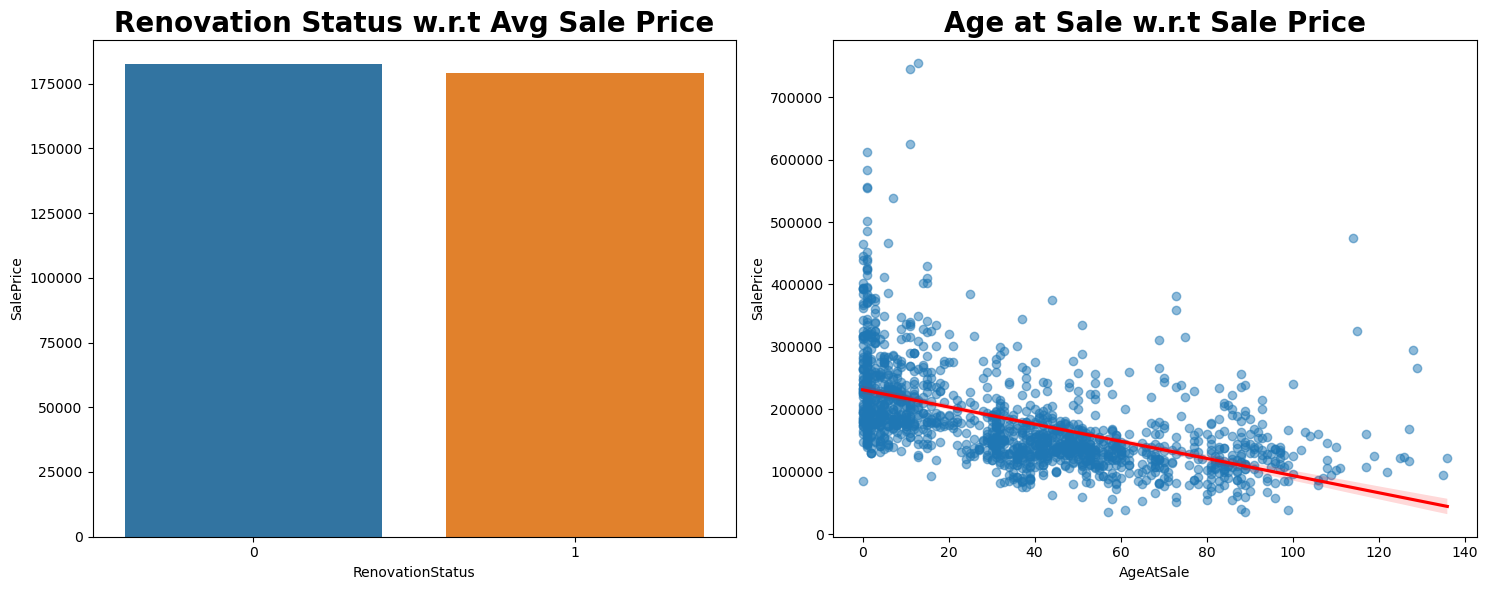

In [54]:
data = df_train.groupby('RenovationStatus')['SalePrice'].mean().to_frame().reset_index()
data

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot(data = data, x = 'RenovationStatus', y= 'SalePrice')
plt.title("Renovation Status w.r.t Avg Sale Price", fontweight = 'black', size = 20)

plt.subplot(1,2,2)
sns.regplot(x = df_train['AgeAtSale'], y = df_train['SalePrice'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Age at Sale w.r.t Sale Price", fontweight = 'black', size =20)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* The Sale Price for the Renovation Status category is almost same
* We see that, Age at sale is having negative relation with Sale Price.

---

### Creating a new feature based on Bathroom details
* **BsmtFullBath-** It shows Basement full bathrooms
* **BsmtHalfBath-** It shows Basement half bathrooms
* **FullBath-** It shows Full bathrooms above grade
* **HalfBath-** It shows Half baths above grade

* **Note:**
    * By adding all these features, we can create a new feature **Total Bathrooms**

In [55]:
df_train["Total_Bathrooms"] = (df_train["FullBath"] + df_train["BsmtFullBath"] + 
                               (0.5 * df_train["BsmtHalfBath"]) + (0.5 * df_train["HalfBath"]))


In [56]:
df_test["Total_Bathrooms"] = (df_test["FullBath"] + df_test["BsmtFullBath"] + 
                               (0.5 * df_test["BsmtHalfBath"]) + (0.5 * df_test["HalfBath"]))

### Visualizing Total Bathrooms w.r.t Avg Sale Price

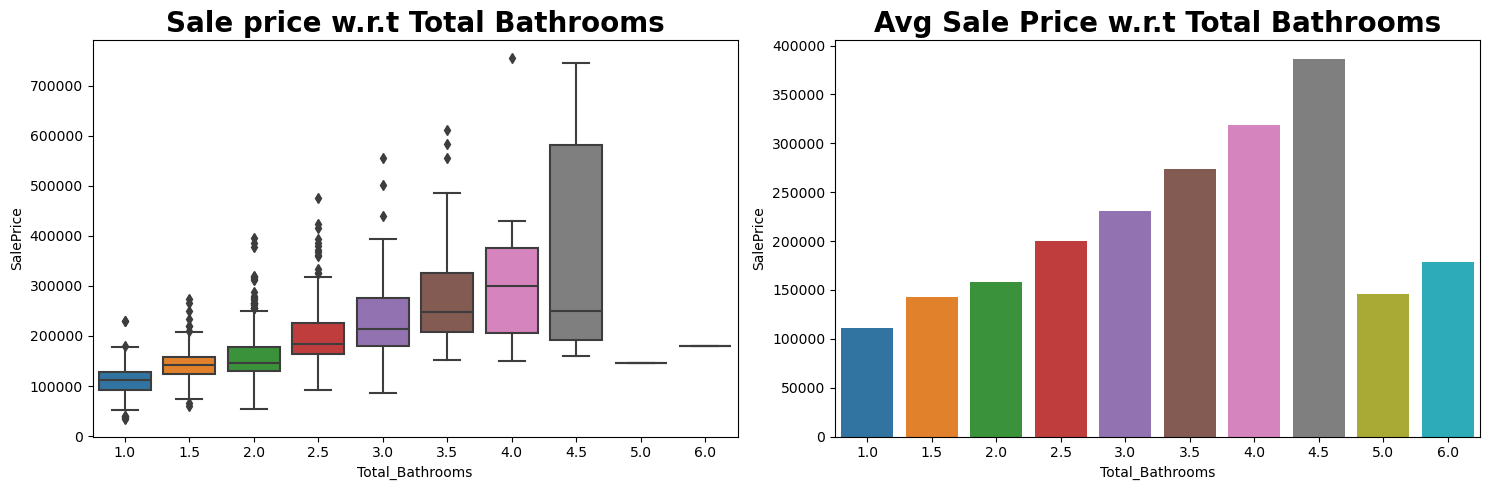

In [57]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(x=df_train['Total_Bathrooms'], y=df_train['SalePrice'])
plt.title("Sale price w.r.t Total Bathrooms", fontweight = 'black', size =20)

plt.subplot(1,2,2)
avg = df_train.groupby('Total_Bathrooms')['SalePrice'].mean().to_frame().reset_index()
sns.barplot(x = avg['Total_Bathrooms'], y = avg['SalePrice'])
plt.title("Avg Sale Price w.r.t Total Bathrooms", fontweight = 'black', size = 20)
plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* We see that there is a **positive corelation** between **Sale price and Total Bathrooms**
* Also, there is class imbalance because there is only 1 record present in Bathrooms 5 & 6
* This feature is very important in our prediction.

---

### Creating a new feature based on Porch details

* **WoodDeckSF-** Wood Deck area in Sqft
* **OpenPorchSF-** Open Porch area in Sqft
* **EnclosedPorch-** Enclosed Porch area in Sqft
* **3SsnPorch-** 3-Season Porch area in Sqft
* **ScreenPorch-** Screen Porch area in Sqft

* **Note:**
  * We can create a new feature **Total Porch Area** by combining all the existed Porch types details

In [58]:
df_train['TotalPorchAreaSF'] = (df_train['WoodDeckSF'] + df_train['OpenPorchSF'] + df_train['EnclosedPorch']+
                                df_train['3SsnPorch'] + df_train['ScreenPorch'])

df_test['TotalPorchAreaSF'] = (df_test['WoodDeckSF'] + df_test['OpenPorchSF'] + df_test['EnclosedPorch']+
                                df_test['3SsnPorch'] + df_test['ScreenPorch'])

### Visualizing these features

In [59]:
cols = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'TotalPorchAreaSF']


    

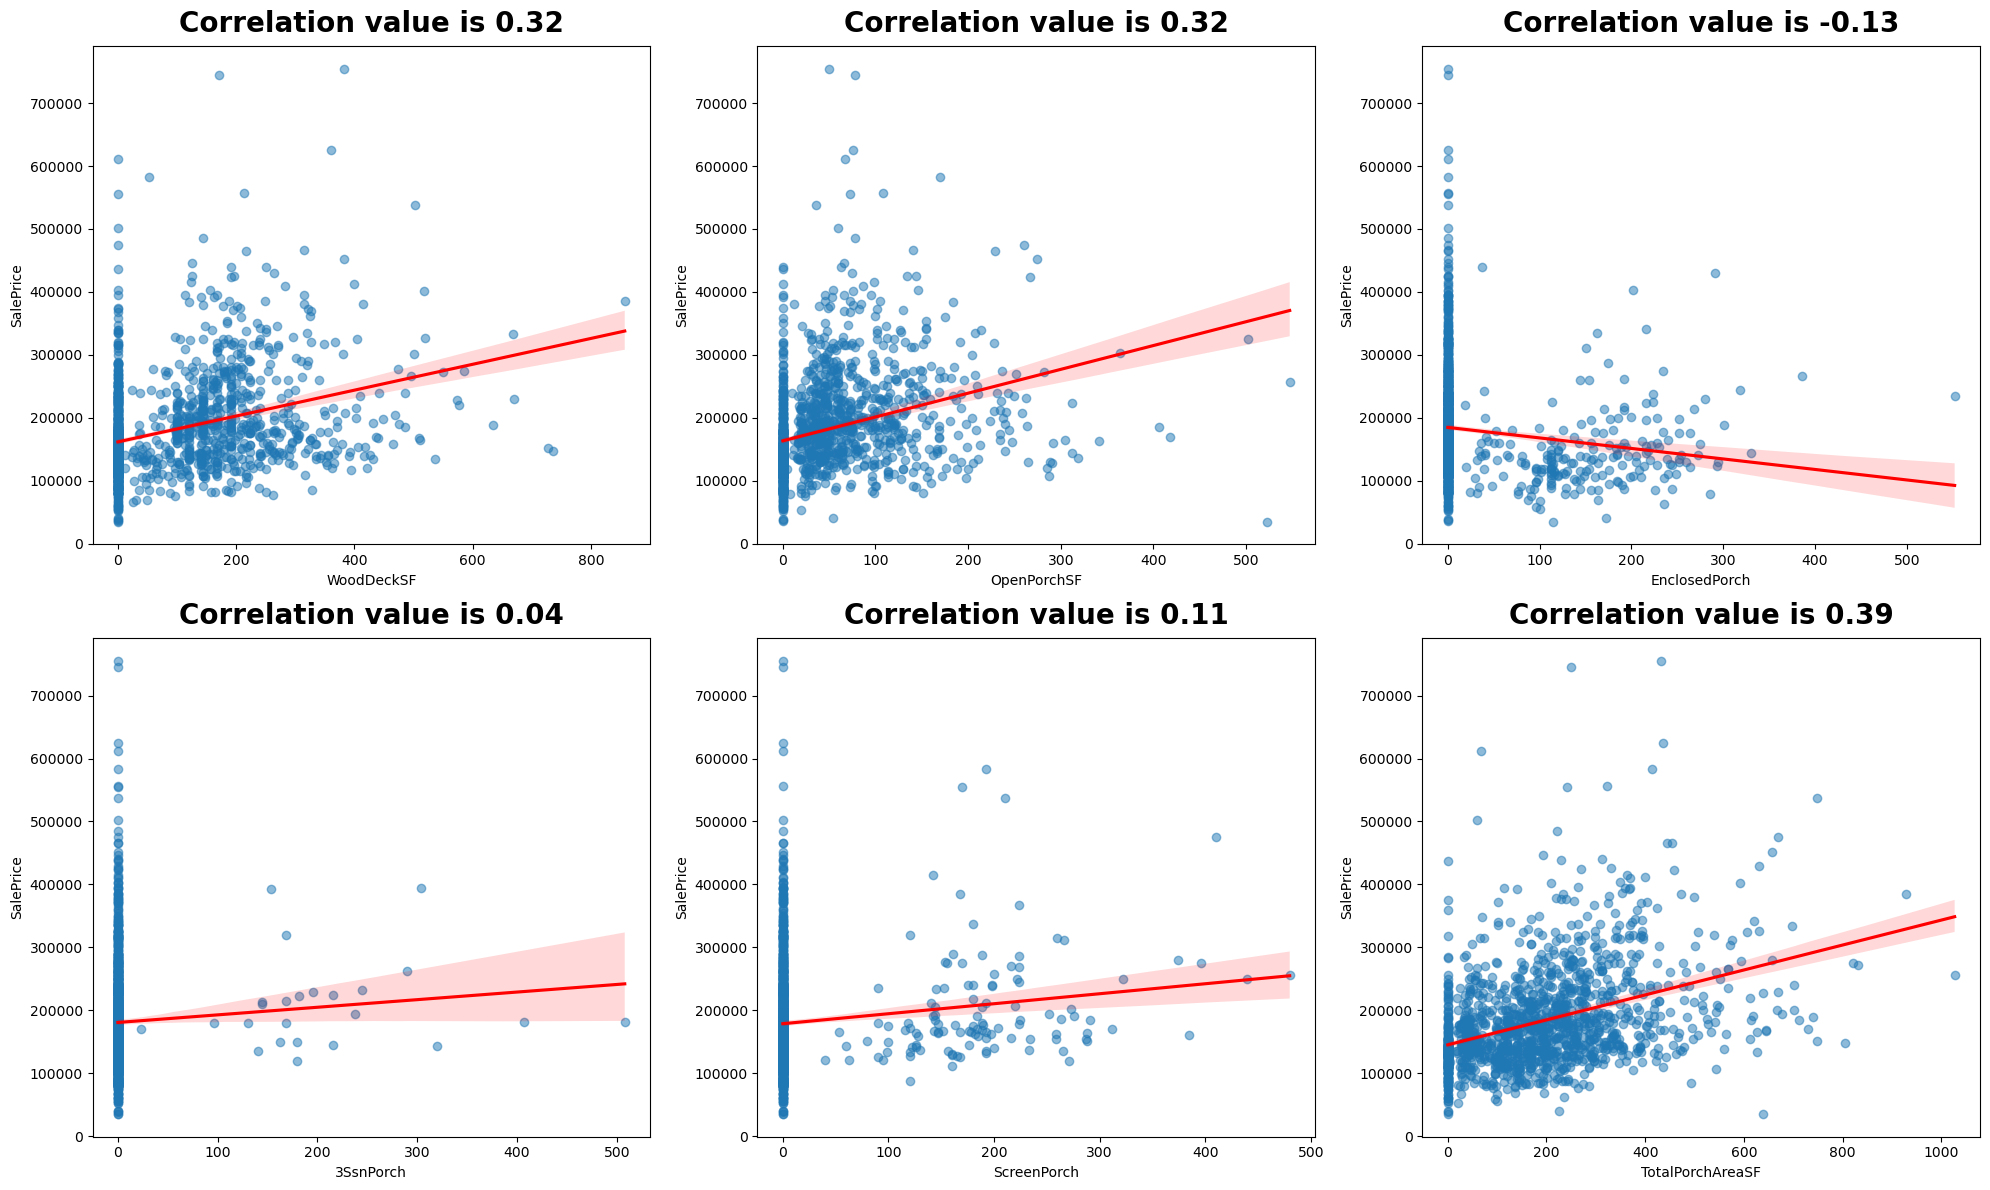

In [60]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.regplot(x = df_train['WoodDeckSF'], y = df_train['SalePrice'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
corr = round(df_train[['WoodDeckSF', 'SalePrice']].corr()['SalePrice'][0],2)
plt.title(f"Correlation value is {corr}", fontweight = 'black', size =20, pad =10)

plt.subplot(2,3,2)
sns.regplot(x = df_train['OpenPorchSF'], y = df_train['SalePrice'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
corr = round(df_train[['OpenPorchSF', 'SalePrice']].corr()['SalePrice'][0],2)
plt.title(f"Correlation value is {corr}", fontweight = 'black', size =20, pad=10)

plt.subplot(2,3,3)
sns.regplot(x = df_train['EnclosedPorch'], y = df_train['SalePrice'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
corr = round(df_train[['EnclosedPorch', 'SalePrice']].corr()['SalePrice'][0],2)
plt.title(f"Correlation value is {corr}", fontweight = 'black', size =20, pad=10)

plt.subplot(2,3,4)
sns.regplot(x = df_train['3SsnPorch'], y = df_train['SalePrice'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
corr = round(df_train[['3SsnPorch', 'SalePrice']].corr()['SalePrice'][0],2)
plt.title(f"Correlation value is {corr}", fontweight = 'black', size =20, pad=10)


plt.subplot(2,3,5)
sns.regplot(x = df_train['ScreenPorch'], y = df_train['SalePrice'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
corr = round(df_train[['ScreenPorch', 'SalePrice']].corr()['SalePrice'][0],2)
plt.title(f"Correlation value is {corr}", fontweight = 'black', size =20, pad=10)


plt.subplot(2,3,6)
sns.regplot(x = df_train['TotalPorchAreaSF'], y = df_train['SalePrice'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
corr = round(df_train[['TotalPorchAreaSF', 'SalePrice']].corr()['SalePrice'][0],2)
plt.title(f"Correlation value is {corr}", fontweight = 'black', size =20, pad=10)


plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Features **WoodDeckSF, OpenPorchSF, TotalPorchAreaSf** are having **moderate correlation** with the target variable SalePrice. These are useful features.
* Features **EnclosedPorch,3SsnPorch,ScreenPorch** are having very **less correlation** with the target variable SalePrice. Can drop these features.

#### Dropping the features having weak correlation

In [61]:
df_train.drop(columns = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch'], inplace = True)
df_test.drop(columns = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch'], inplace = True)

---

### Creating new fetaure based on Square footage details

* **BsmtFinSF1** - Type 1 finished square feet
* **BsmtFinSF2** - Type 2 finished square feet
* **BsmtUnfSF** - Unfinished square feet of basement area
* **TotalBsmtSF** - Total square feet of basement area
* **1stFlrSF** - First Floor square feet
* **2ndFlrSF** - Second Floor square feet

* **Note:**
  * By adding all these features, we can create **Total Square footage feature** which indicates the total sqft of the house

In [62]:
df_train['Total_Square_footage'] = (df_train['BsmtFinSF1'] +df_train['BsmtFinSF2'] + df_train['BsmtUnfSF'] +
                                    df_train['1stFlrSF'] + df_train['2ndFlrSF'])

df_test['Total_Square_footage'] = (df_test['BsmtFinSF1'] +df_test['BsmtFinSF2'] + df_test['BsmtUnfSF'] +
                                    df_test['1stFlrSF'] + df_test['2ndFlrSF'])

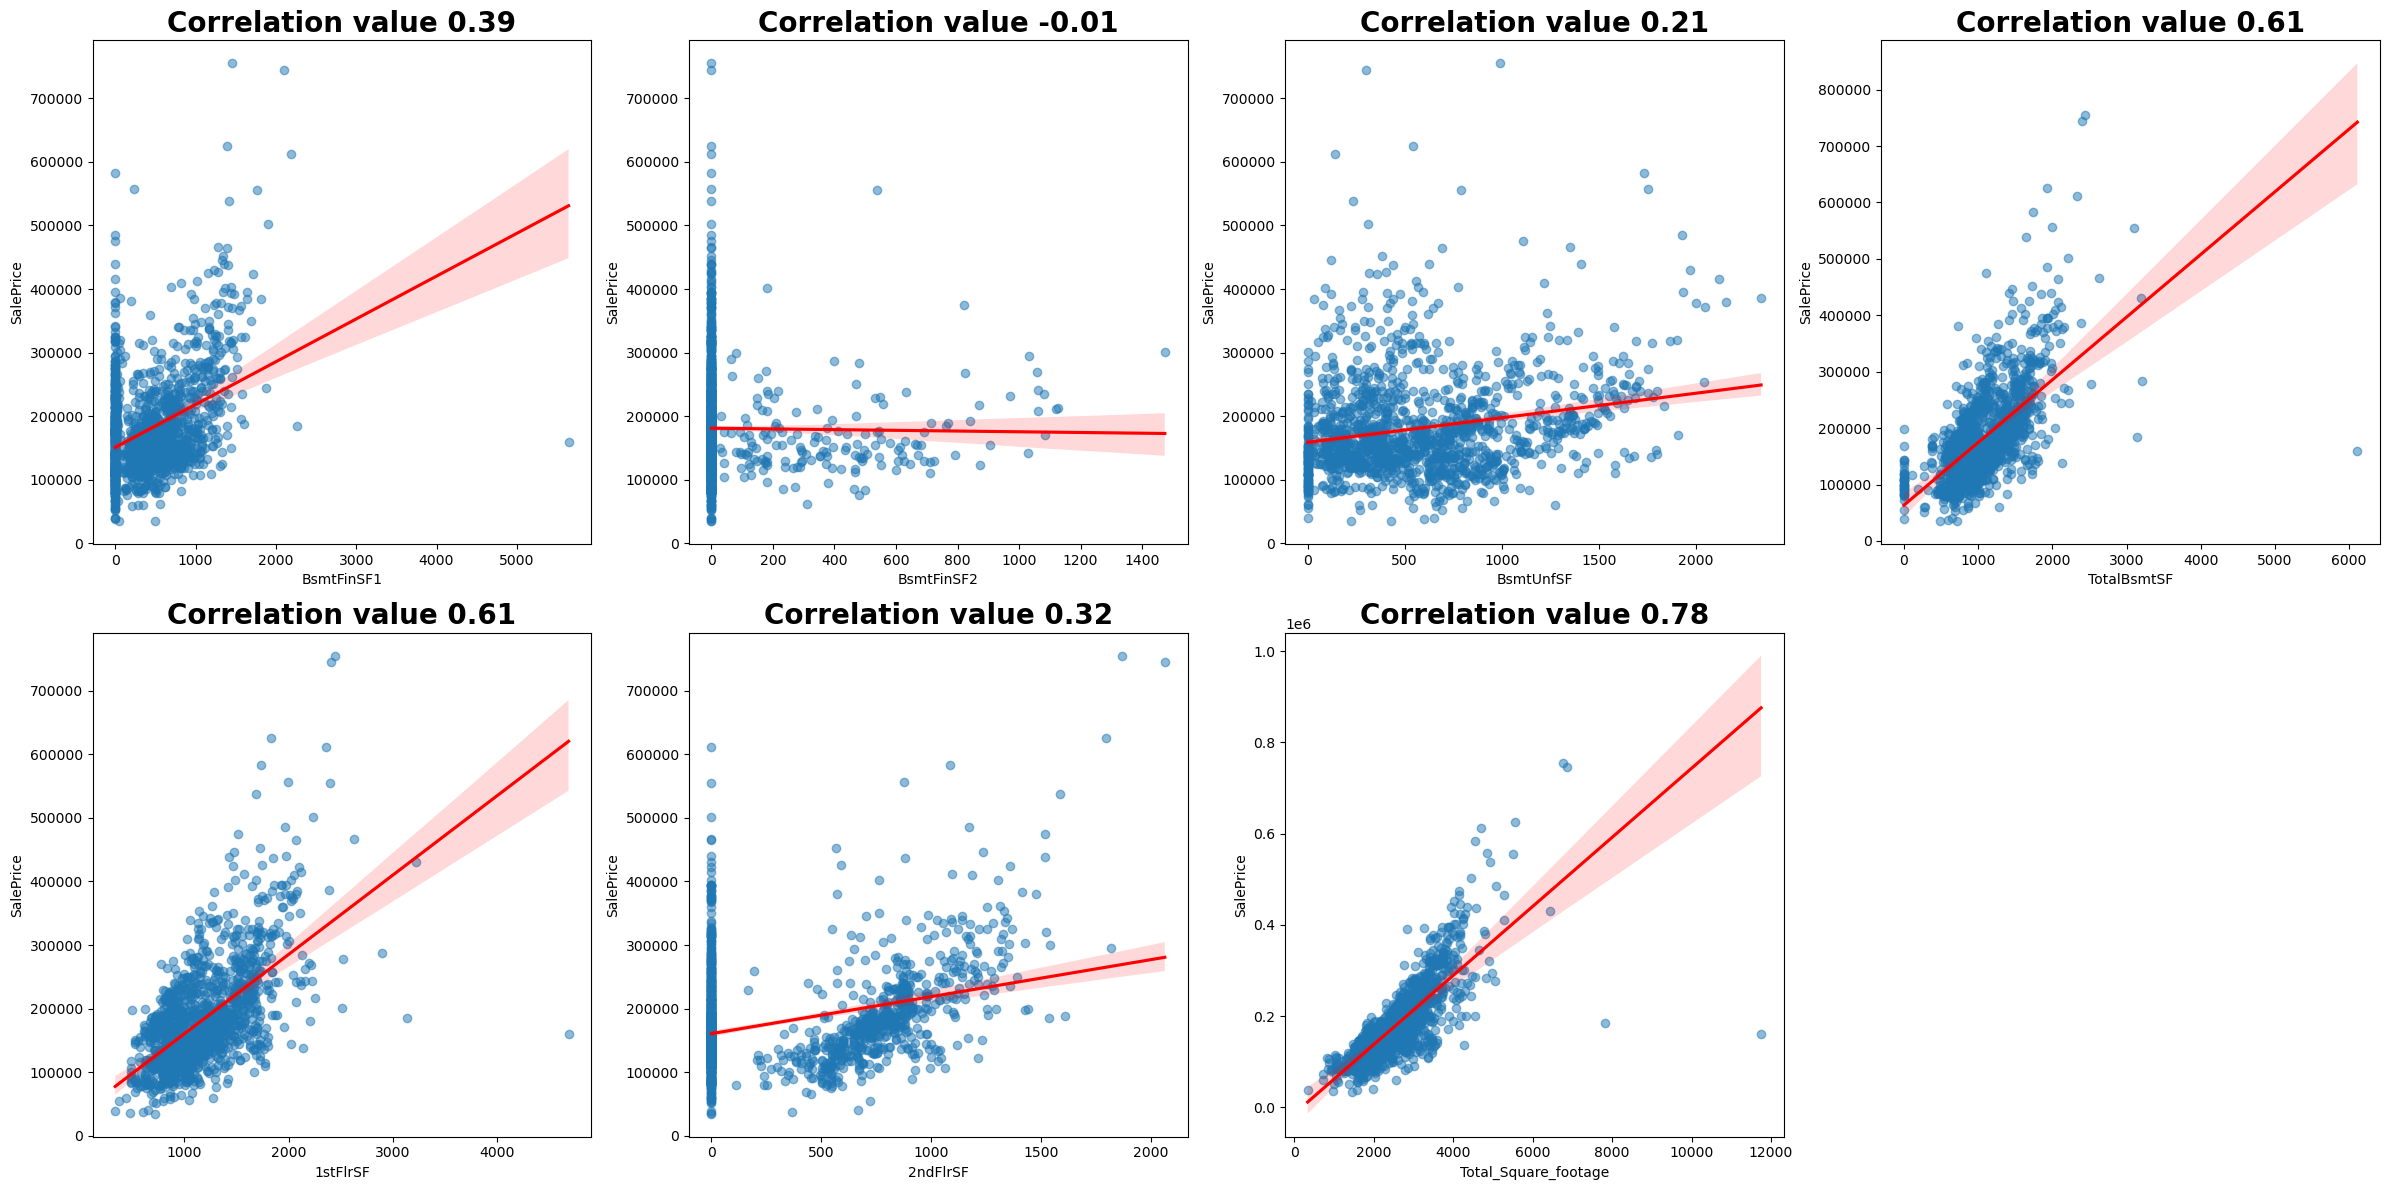

In [63]:
cols = ['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Total_Square_footage']

plt.figure(figsize = (24,12))
for index, col in enumerate(cols):
    plt.subplot(2,4, index+1)
    sns.regplot(x=df_train[col], y=df_train['SalePrice'],  scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    corr = round(df_train[[col, "SalePrice"]].corr()["SalePrice"][0],2)
    plt.title(f"Correlation value {corr}", fontweight = 'black', size = 20)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Features **TotalBsmtSF, 1stFIrSF,Total Square footage** are having **strong correlation** with SalePrice.
* Features **BsmtFinSF1, 2ndFIrSF, BsmtUnfSF** are having **moderate correlation** with SalePrice.
* Features **BsmtFinSF2, BsmtUnfSF** are having **weak correlation** with SalePrice. Can drop these features.

#### Dropping features with weak correlation

In [64]:
df_train.drop(columns = ['BsmtFinSF2', 'BsmtUnfSF'], inplace = True)
df_test.drop(columns = ['BsmtFinSF2', 'BsmtUnfSF'], inplace = True)

---

### Creating new feature using 'Condition1' & 'Condition2'

* **Condition1-** Proximity to main road or railroad
* **Condition2-** Proximity to main road or railroad (if a second is present)
* **Note:**
  * We have seen earlier that Condition2 having high class imbalance
  * Instead of keeping two features **Condition1** and **Condition2**, lets combine both. After Combining we can create a new boolean feature **ProximityStatus** indicating **No if its Norm or else Yes if there's any proximity**

In [65]:
def condition(df):
    df['Condition2'] = df['Condition2'].replace({"Norm":""})
    combined_condition = []
    for val1, val2 in zip(df["Condition1"], df["Condition2"]):
        if val2 == "":
            combined_condition.append(val1)
        elif val1 == val2:
            combined_condition.append(val1)
        else:
            combined_condition.append(val1+val2)
    df["Combined_Condition"] = combined_condition
    df["ProximityStatus"]= (df["Combined_Condition"] == 'Norm').astype(int)
        
    

In [66]:
condition(df_train)
condition(df_test)

#### Dropping the features

In [67]:
df_train.drop(columns = ['Condition1', 'Condition2', 'Combined_Condition'], inplace = True)
df_test.drop(columns = ['Condition1', 'Condition2', 'Combined_Condition'], inplace = True)

### Creating a new feature based on Heating & HeatingQC

* **Heating-** Type of heating
* **HeatingQC-** Heating quality and condition

* **Note-**
   * We have seen that Fetaure **Heating** has very high class Imbalance. Lets combine both **Heating and HeatingQC**. By doing this so, we can reduce class imbalance

In [68]:
df_train['Heating_Quality'] = df_train['Heating'] + '-' + df_train['HeatingQC']
df_test['Heating_Quality'] = df_test['Heating'] + '-' + df_test['HeatingQC']

#### Dropping the features 

In [69]:
df_train.drop(columns = ['Heating', 'HeatingQC'], inplace = True)
df_test.drop(columns = ['Heating', 'HeatingQC'], inplace = True)

### Creating some Boolean Features

In [70]:
def boolean_features(df):
    df['Has2ndFloor'] = (df['2ndFlrSF'] != 0).astype(int)
    df['HasFirePlace'] = (df['Fireplaces'] != 0).astype(int)
    df['HasGarage'] = (df['GarageArea'] != 0).astype(int)
    df['HasBsmt'] = (df['TotalBsmtSF'] != 0).astype(int)
    

In [71]:
boolean_features(df_train)
boolean_features(df_test)

#### Visualizing these features

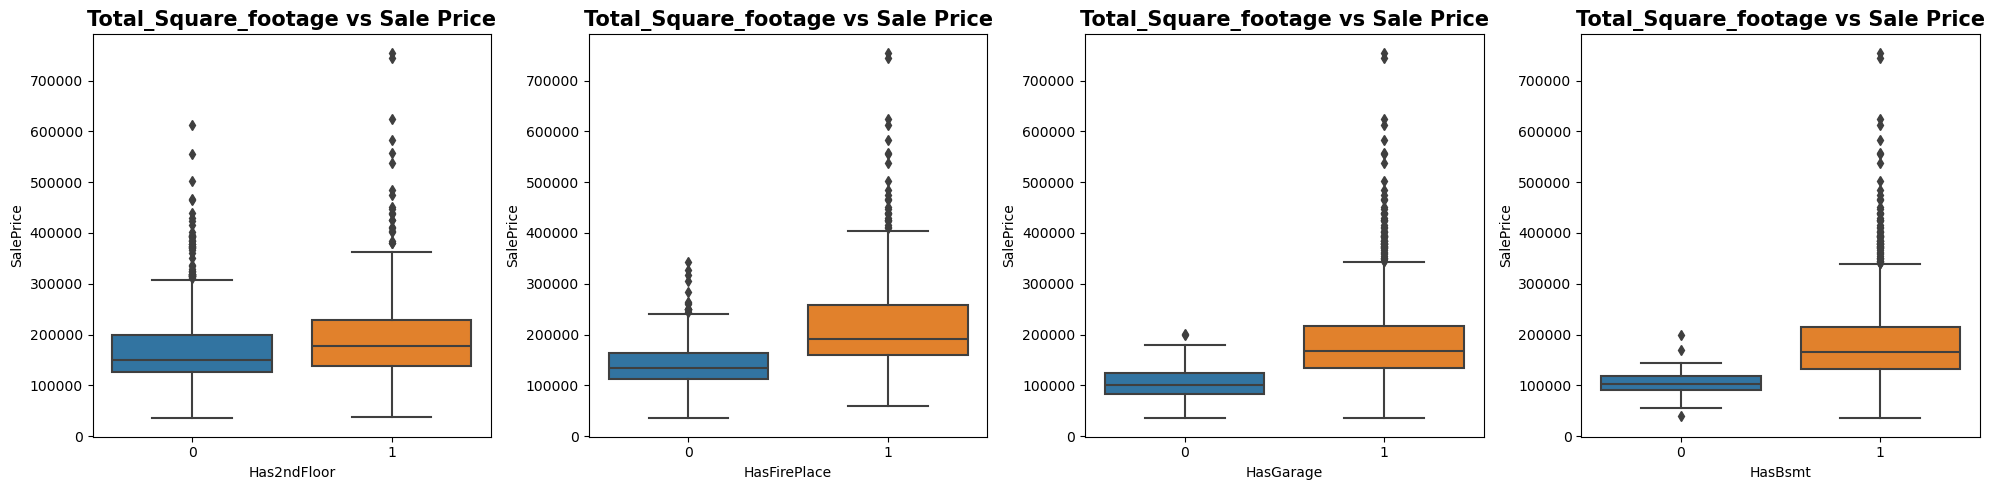

In [72]:
plt.figure(figsize=(20,5))
for index, columns in enumerate(['Has2ndFloor', 'HasFirePlace', 'HasGarage', 'HasBsmt']):
    plt.subplot(1,4,index+1)
    sns.boxplot(x = columns, y = df_train['SalePrice'], data = df_train)
    plt.title(f"{col} vs Sale Price", fontweight = 'black', size = 15)
    plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* It seems that all these features are more important for our prediction

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Data Preprocessing </b></div>

### Applying log transformation on target variable Sale Price

In [73]:
z = df_train['SalePrice']

df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

Text(0.5, 1.0, 'Distribution of Sale Price after Transformation')

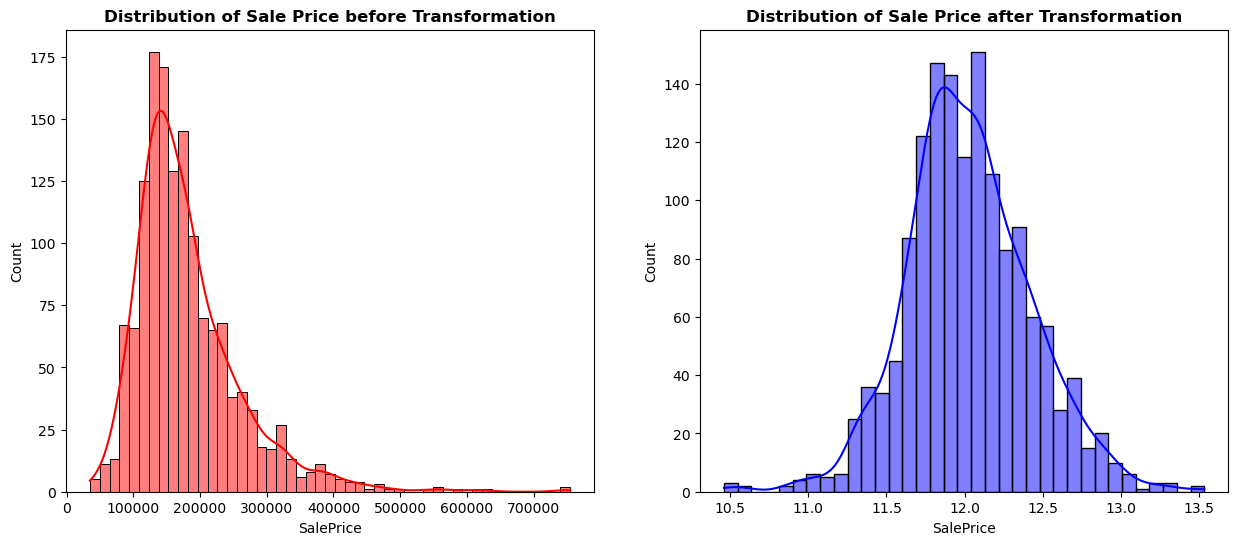

In [74]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(z, color = 'red', kde = True)
plt.title("Distribution of Sale Price before Transformation", fontweight = 'black')

plt.subplot(1,2,2)
sns.histplot(df_train['SalePrice'], color = 'blue', kde= True)
plt.title("Distribution of Sale Price after Transformation", fontweight = 'black')

---

### Applying Box Cox transformation to Continuous Numerical Features

In [75]:
con_cols = ["LotFrontage","LotArea","BsmtFinSF1","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF",
            "GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","PoolArea","MiscVal","AgeAtSale","TotalPorchAreaSF",
            "Total_Square_footage"]

In [76]:
df_train[con_cols].skew().sort_values().to_frame().rename(columns = {0: 'Skewness'})

Skewness
GarageArea             0.179981
AgeAtSale              0.609030
2ndFlrSF               0.813030
TotalPorchAreaSF       1.102313
GrLivArea              1.366560
1stFlrSF               1.376757
TotalBsmtSF            1.524255
WoodDeckSF             1.541376
BsmtFinSF1             1.685503
Total_Square_footage   1.776700
LotFrontage            2.213556
OpenPorchSF            2.364342
LowQualFinSF           9.011341
LotArea               12.207688
PoolArea              14.828374
MiscVal               24.476794

In [77]:
for feature in con_cols:
    # Adding 1 to avoid log(0), which is undefined
    df_train[feature] = np.log1p(df_train[feature])

# Apply log transformation to df_test
for feature in con_cols:
    # Adding 1 to avoid log(0), which is undefined
    df_test[feature] = np.log1p(df_test[feature])

In [78]:
df_train[con_cols].skew().sort_values().to_frame().rename(columns = {0: 'Skewness'})

Skewness
TotalBsmtSF           -5.154670
GarageArea            -3.482604
TotalPorchAreaSF      -1.312382
LotFrontage           -0.906703
AgeAtSale             -0.843471
BsmtFinSF1            -0.618410
Total_Square_footage  -0.348571
LotArea               -0.137404
OpenPorchSF           -0.023397
GrLivArea             -0.006140
1stFlrSF               0.080114
WoodDeckSF             0.153537
2ndFlrSF               0.289643
MiscVal                5.170704
LowQualFinSF           7.460317
PoolArea              14.363102

#### Dropping features with high skewness

In [79]:
df_train.drop(columns = ['MiscVal', 'LowQualFinSF', 'PoolArea'], inplace = True)
df_test.drop(columns = ['MiscVal', 'LowQualFinSF', 'PoolArea'], inplace = True)

---

### Performing Targeting Encoding on Categorical Features with high cardinality

In [80]:
cols = ["Neighborhood","Exterior1st","Exterior2nd","Heating_Quality"]

for col in cols:
    data = df_train.groupby(col)['SalePrice'].mean()
    for value in data.index:
        df_train[col] = df_train[col].replace({value : data[value]})
        df_test[col] = df_test[col].replace({value : data[value]})            

---

In [81]:
df_train.isnull().sum().sum()

0

### Performing Manual Encoding on other Categorical features

In [82]:
cols = ["HouseStyle","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","Electrical","KitchenQual",
        "GarageQual","GarageCond"]

In [83]:
df_train['BsmtQual'].astype(str)
df_test['BsmtQual'].astype(str)

df_train['BsmtCond'].astype(str)
df_test['BsmtCond'].astype(str)

df_train['BsmtExposure'].astype(str)
df_test['BsmtExposure'].astype(str)

df_train['GarageQual'].astype(str)
df_test['GarageQual'].astype(str)

df_train['GarageCond'].astype(str)
df_test['GarageCond'].astype(str)

1460      TA
1461      TA
1462      TA
1463      TA
1464      TA
        ... 
2914    None
2915      TA
2916      TA
2917    None
2918      TA
Name: GarageCond, Length: 1459, dtype: object

In [84]:
house_style_mapping = {'1Story' : 0, '2Story' : 1, '1.5Fin' :2, 'SLvl' : 3, 'SFoyer' :4, '1.5Unf' :5, '2.5Unf' :6, '2.5Fin' :7}

df_train['HouseStyle'] = df_train['HouseStyle'].map(house_style_mapping)
df_test['HouseStyle'] = df_test['HouseStyle'].map(house_style_mapping)

In [85]:
Exter_Qual_mapping = {'Fa' : 0, 'TA' : 1, 'Gd' :2, 'Ex' :3} 

df_train['ExterQual'] = df_train['ExterQual'].map(Exter_Qual_mapping)
df_test['ExterQual'] = df_test['ExterQual'].map(Exter_Qual_mapping)


In [86]:
ExterCond_mapping = {"Fa" :0, "TA" :1, "Gd" :2, "Ex":3, "Po":4}

df_train['ExterCond'] = df_train['ExterCond'].map(ExterCond_mapping)
df_test['ExterCond'] = df_test['ExterCond'].map(ExterCond_mapping)

In [87]:
BsmtQual_mapping = {"Fa" :0, "TA" :1, "Gd" :2, "Ex":3, "0":4}

df_train['BsmtQual'] = df_train['BsmtQual'].map(BsmtQual_mapping)
df_test['BsmtQual'] = df_test['BsmtQual'].map(BsmtQual_mapping)

In [88]:
BsmtCond_mapping = {"Fa" :0, "TA" :1, "Gd" :2, "Po":3, "0":4}

df_train['BsmtCond'] = df_train['BsmtCond'].map(BsmtCond_mapping)
df_test['BsmtCond'] = df_test['BsmtCond'].map(BsmtCond_mapping)

In [89]:
BsmtExposure_mapping = {"0" :0, "Av" :1, "Gd" :2, "Mn":3, "No":4}

df_train['BsmtExposure'] = df_train['BsmtExposure'].map(BsmtExposure_mapping)
df_test['BsmtExposure'] = df_test['BsmtExposure'].map(BsmtExposure_mapping)

In [90]:
Electrical_Mapping = {'SBrkr' :0, 'FuseA' : 1, 'FuseF':2, 'FuseP':3, 'Mix':4}

df_train['Electrical'] = df_train['Electrical'].map(Electrical_Mapping)
df_test['Electrical'] = df_test['Electrical'].map(Electrical_Mapping)

In [91]:
KitchenQual_mapping = {'TA' : 0, 'Gd' : 1, 'Ex' :2, 'Fa' :3} 

df_train['KitchenQual'] = df_train['KitchenQual'].map(KitchenQual_mapping)
df_test['KitchenQual'] = df_test['KitchenQual'].map(KitchenQual_mapping)

In [92]:
GarageQual_mapping = {"Fa" :0, "TA" :1, "Gd" :2, "Ex":3, "Po":4, "0" : 5}

df_train['GarageQual'] = df_train['GarageQual'].map(GarageQual_mapping)
df_test['GarageQual'] = df_test['GarageQual'].map(GarageQual_mapping)

In [93]:
GarageCond_mapping = {"Fa" :0, "TA" :1, "Gd" :2, "Ex":3, "Po":4, "0" : 5}

df_train['GarageCond'] = df_train['GarageCond'].map(GarageCond_mapping)
df_test['GarageCond'] = df_test['GarageCond'].map(GarageCond_mapping)

---

### Performing One Hot encoding for Nominal categorical columns

In [94]:
cols = df_train.select_dtypes(include="object").columns

In [95]:
df_train = pd.get_dummies(df_train, columns = cols)
df_test = pd.get_dummies(df_test, columns = cols)

In [96]:
df_train = df_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)

In [97]:
df_test = df_test.applymap(lambda x: int(x) if isinstance(x, bool) else x)

In [98]:
index_to_remove = df_test[df_test['Heating_Quality'] == 'Wall-Po'].index

# Drop the row by index
df_test.drop(index_to_remove, inplace=True)

In [99]:
print(f"Train data has {df_train.shape[0]} rows and {df_train.shape[1]} columns")
print(f"Test data has {df_test.shape[0]} rows and {df_test.shape[1]} columns")

Train data has 1460 rows and 139 columns
Test data has 1458 rows and 138 columns


---

In [100]:
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

### Seperating features(Independent & Dependent) for Model training

In [101]:
X = df_train.drop(columns = ['SalePrice'])
y = df_train["SalePrice"]

---

### Splitting the Data for Model Training & Testing

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [103]:
print("Dimension of x_train:", x_train.shape)
print("Dimension of x_test:", x_test.shape)
print("Dimension of y_train:", y_train.shape)
print("Dimension of y_test:", y_test.shape)

Dimension of x_train: (1078, 138)
Dimension of x_test: (270, 138)
Dimension of y_train: (1078,)
Dimension of y_test: (270,)


---

### Feature Scaling using Robust Scaling

In [104]:
scaler = RobustScaler()

In [105]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Scaling a separate test dataset
# df_test_scaled = scaler.fit_transform(df_test)

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Model Building & Evaluation </b></div>

### Creating a function to train model using different Regression techniques

In [106]:
r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

In [107]:
def model_evaluate(model):
    model.fit(x_train_scaled, y_train)
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)

    ## Evaluation
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)
    adjusted_r2 = 1- ((1-r2) * (x_test_scaled.shape[0] -1) / (x_test_scaled.shape[0]-x_test_scaled.shape[1] -1))

    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    r2_value.append(r2)
    adjusted_r2_value.append(adjusted_r2)

    print(f"R2 score of the {model} is -->", r2)
    print(f"Adjusted R2 score of the {model} is -->", adjusted_r2)
    print("-"*50)
    print(f"MAE of the {model} is -->", mae)
    print(f"MSE of the {model} is -->", mse)
    print(f"RMSE of the {model} is -->", rmse)

    ### Scatter plot
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    plt.scatter(x= y_train, y=y_train_pred, color = 'red', label = 'Train')
    plt.scatter(x=y_test, y=y_test_pred, color = 'blue', label = 'Test')
    plt.xlabel("True Values")
    plt.ylabel("Predicted values")
    plt.legend()
    plt.title("True vs Predicted Values", fontweight = 'black', size = 15)

    ### Residual Plot
    plt.subplot(1,2,2)
    plt.scatter(x = y_train_pred, y = y_train_pred - y_train, color = 'red', label = 'Train')
    plt.scatter(x = y_test_pred, y = y_test_pred - y_test, color = 'blue', label = 'Test')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.legend()
    plt.title("Residual Plot", fontweight = 'black', size = 15)
    plt.show()

---

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> 1. Linear Regression Model </b></div>

R2 score of the LinearRegression() is --> 0.8754572664254527
Adjusted R2 score of the LinearRegression() is --> 0.7442595776217312
--------------------------------------------------
MAE of the LinearRegression() is --> 0.08773021383353637
MSE of the LinearRegression() is --> 0.015819763155446843
RMSE of the LinearRegression() is --> 0.12577663994338076


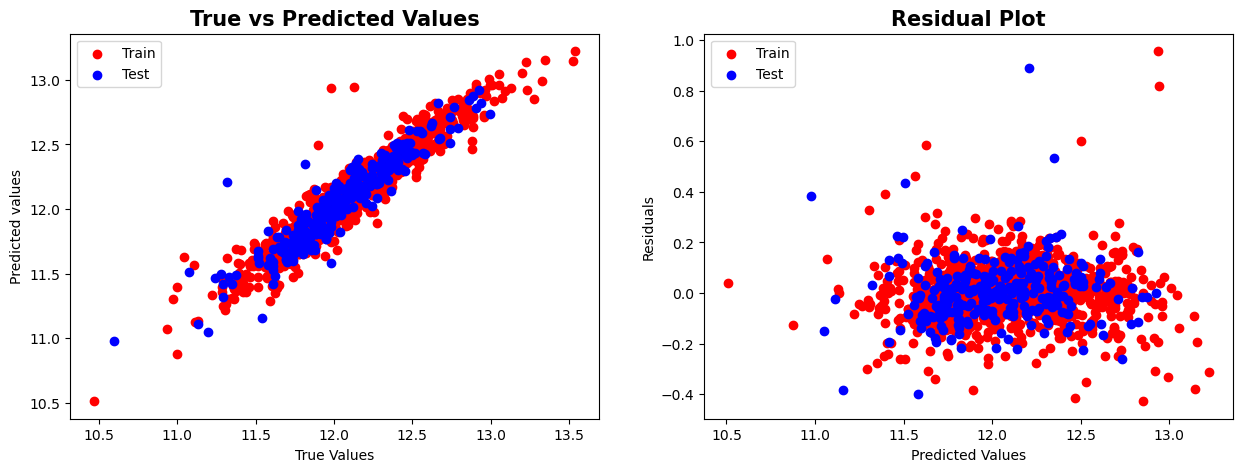

In [108]:
model_evaluate(LinearRegression())

---

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> 2. Support Vector Regressor Model </b></div>

R2 score of the SVR() is --> 0.867396637565375
Adjusted R2 score of the SVR() is --> 0.7277075992754647
--------------------------------------------------
MAE of the SVR() is --> 0.08807521823933151
MSE of the SVR() is --> 0.01684364657112651
RMSE of the SVR() is --> 0.12978307505652079


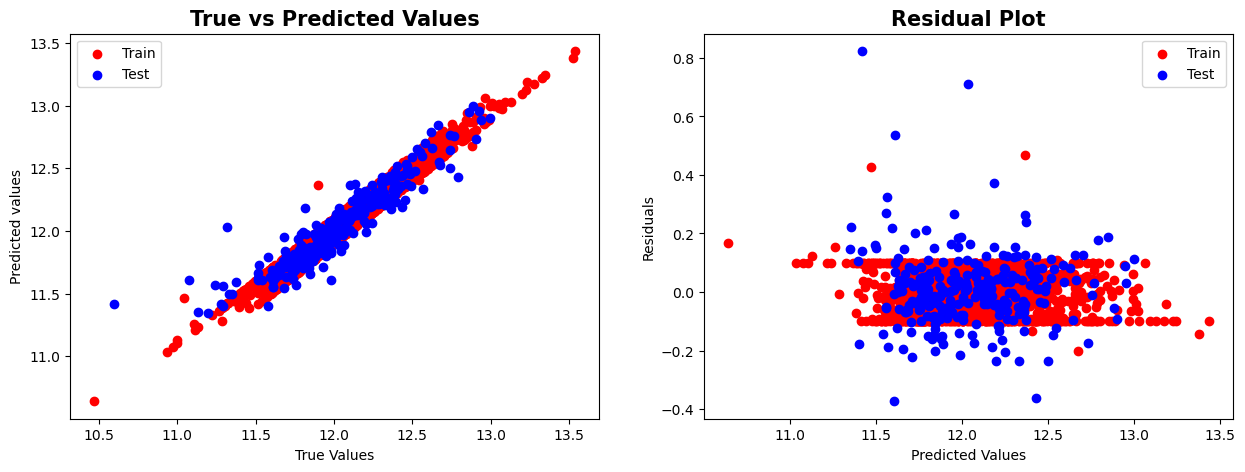

In [109]:
model_evaluate(SVR())

---

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> 3. Random Forest Regressor Model </b></div>

R2 score of the RandomForestRegressor() is --> 0.8569280480420309
Adjusted R2 score of the RandomForestRegressor() is --> 0.7062110299489033
--------------------------------------------------
MAE of the RandomForestRegressor() is --> 0.09538927453557164
MSE of the RandomForestRegressor() is --> 0.018173395823271876
RMSE of the RandomForestRegressor() is --> 0.13480873793368098


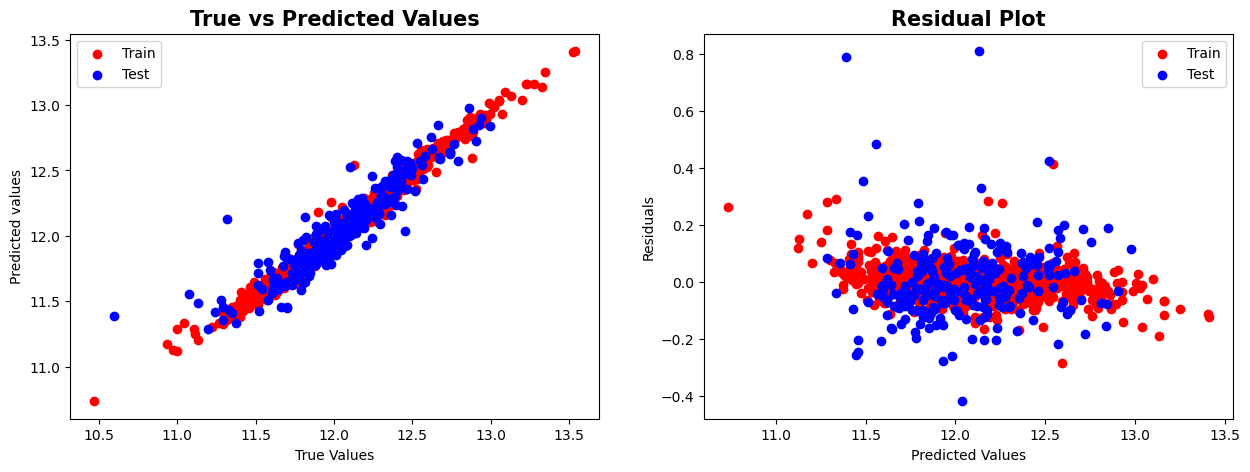

In [110]:
model_evaluate(RandomForestRegressor())

---

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> 4. AdaBoost Regressor Model </b></div>

R2 score of the AdaBoostRegressor() is --> 0.7989870326252599
Adjusted R2 score of the AdaBoostRegressor() is --> 0.5872329143220987
--------------------------------------------------
MAE of the AdaBoostRegressor() is --> 0.11816017174928278
MSE of the AdaBoostRegressor() is --> 0.025533224169505795
RMSE of the AdaBoostRegressor() is --> 0.15979118927370745


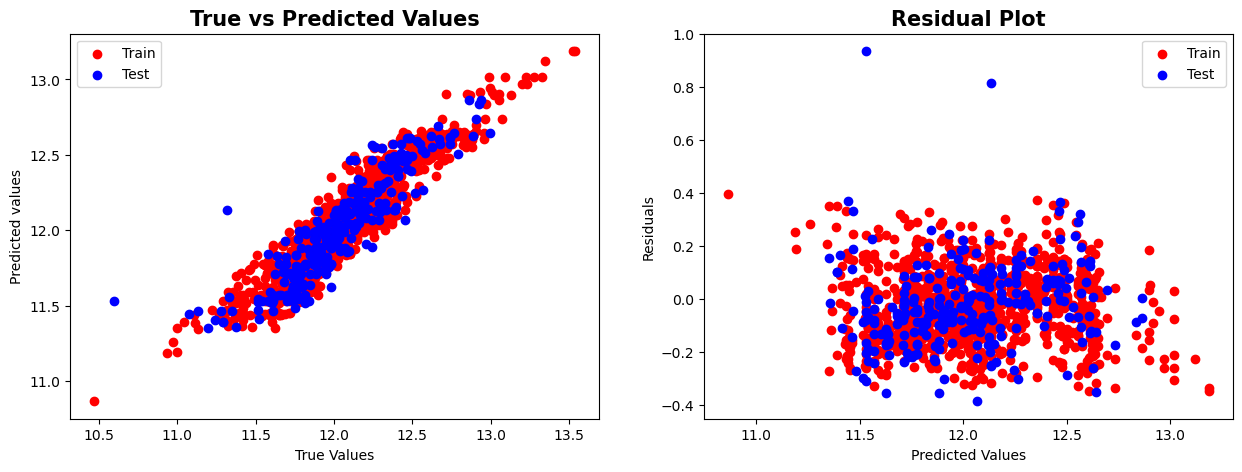

In [111]:
model_evaluate(AdaBoostRegressor())

---

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> 5. Gradient Boost Regressor Model </b></div>

R2 score of the GradientBoostingRegressor() is --> 0.8782081918513742
Adjusted R2 score of the GradientBoostingRegressor() is --> 0.7499084244886998
--------------------------------------------------
MAE of the GradientBoostingRegressor() is --> 0.08340678926614176
MSE of the GradientBoostingRegressor() is --> 0.01547033298439374
RMSE of the GradientBoostingRegressor() is --> 0.12437979331223276


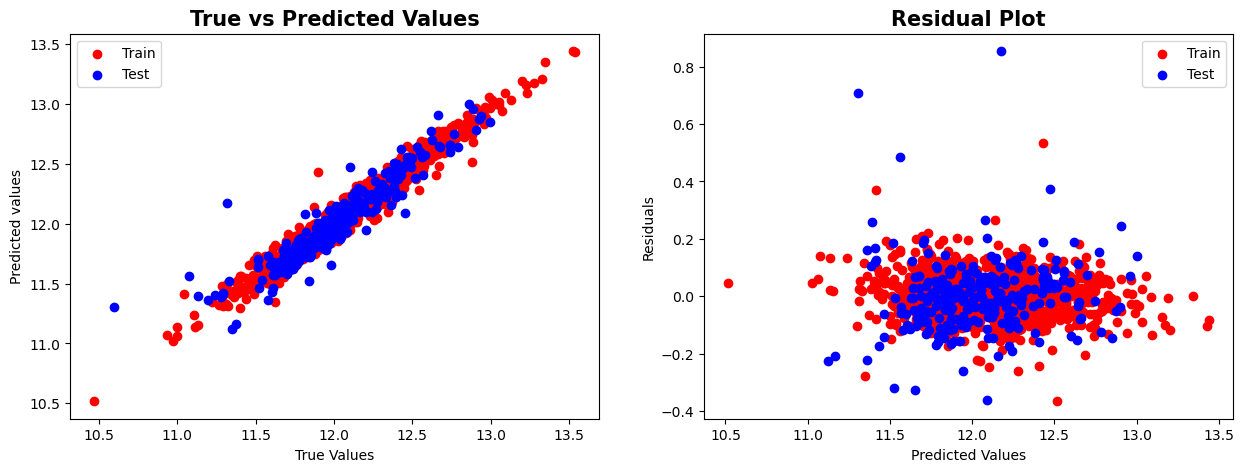

In [112]:
model_evaluate(GradientBoostingRegressor())

---

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> 6. LGBM Regressor Model </b></div>

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2982
[LightGBM] [Info] Number of data points in the train set: 1078, number of used features: 100
[LightGBM] [Info] Start training from score 12.073311
R2 score of the LGBMRegressor() is --> 0.8780396036155701
Adjusted R2 score of the LGBMRegressor() is --> 0.7495622394854073
--------------------------------------------------
MAE of the LGBMRegressor() is --> 0.0863971472701051
MSE of the LGBMRegressor() is --> 0.015491747529302706
RMSE of the LGBMRegressor() is --> 0.1244658488473955


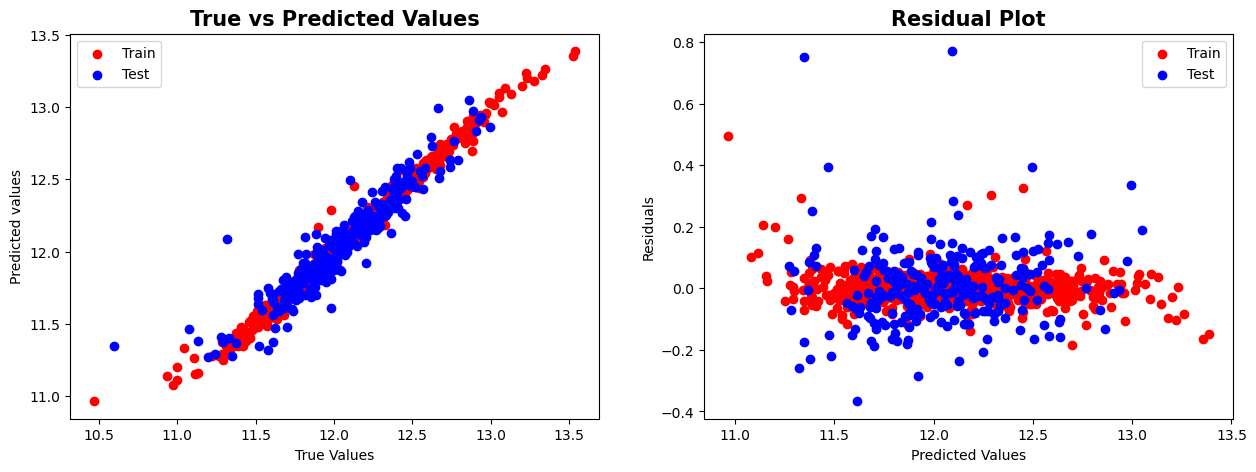

In [113]:
model_evaluate(LGBMRegressor())

---

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> 7. XGB Regressor Model </b></div>

R2 score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) is --> 0.8669038061744422
Adjusted R2 score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_ro

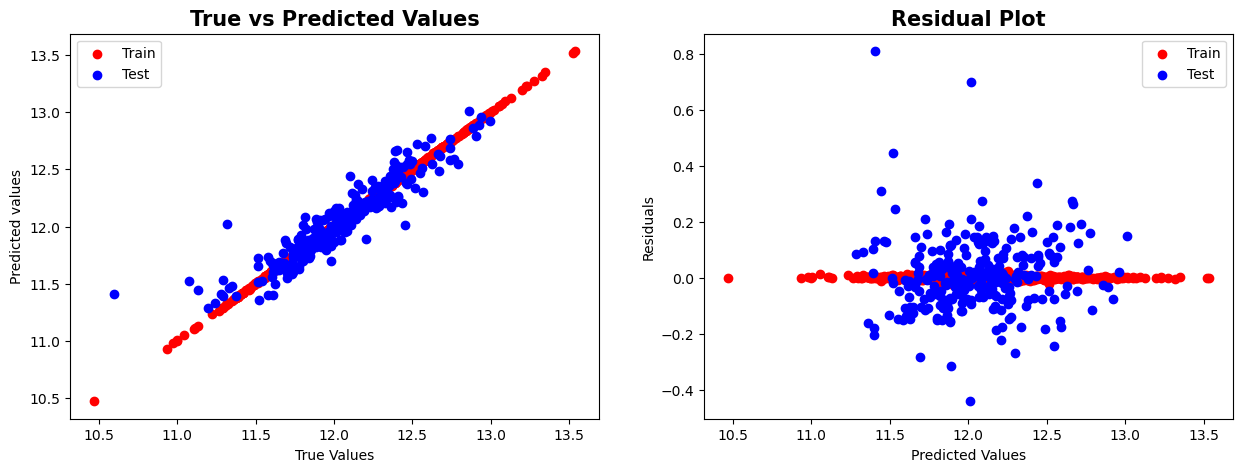

In [114]:
model_evaluate(XGBRegressor())

---

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> 8. CatBoost Regressor Model </b></div>

R2 score of the <catboost.core.CatBoostRegressor object at 0x155f1b750> is --> 0.9019335832133615
Adjusted R2 score of the <catboost.core.CatBoostRegressor object at 0x155f1b750> is --> 0.7986269762167499
--------------------------------------------------
MAE of the <catboost.core.CatBoostRegressor object at 0x155f1b750> is --> 0.07388856389845337
MSE of the <catboost.core.CatBoostRegressor object at 0x155f1b750> is --> 0.01245666802503053
RMSE of the <catboost.core.CatBoostRegressor object at 0x155f1b750> is --> 0.11160944415698221


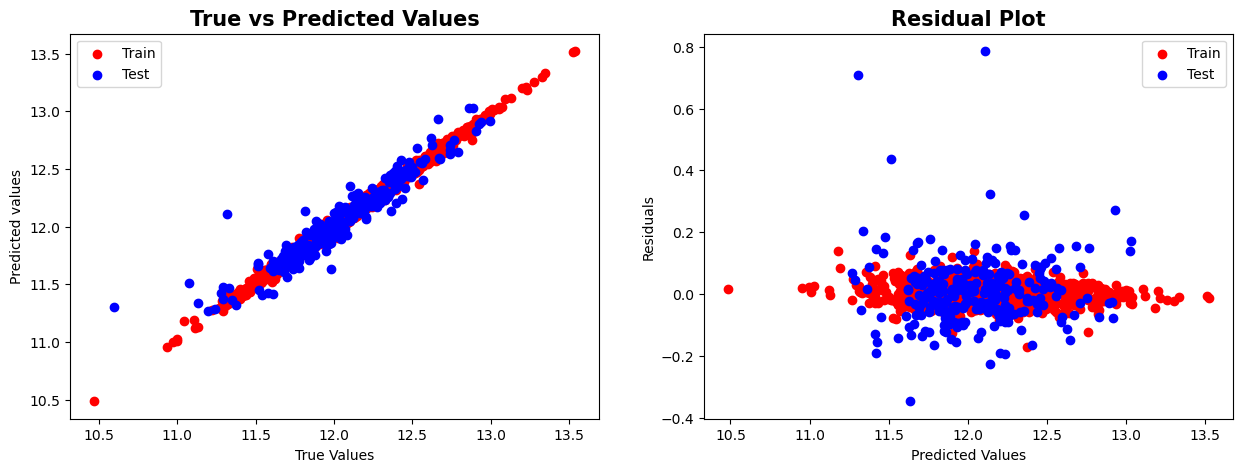

In [115]:
model_evaluate(CatBoostRegressor(verbose=False))

---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Models Performance Comparision </b></div>

In [116]:
models = ['LinearRegression', 'SVR', 'RandomForestRegressor', 'AdaBoostRegressor', 'GradientBoostRegressor',
         'LGBMRegressor', 'XGBoostRegressor', 'CatBoostRegressor']

In [117]:
models_eval_df = pd.DataFrame({"Model":models,"R2_Score":r2_value,"Adjusted_R2_Score":adjusted_r2_value,
                       "MAE":mae_value,"MSE":mse_value,"RMSE":rmse_value})

In [118]:
models_eval_df

Model  R2_Score  Adjusted_R2_Score       MAE       MSE  \
0        LinearRegression  0.875457           0.744260  0.087730  0.015820   
1                     SVR  0.867397           0.727708  0.088075  0.016844   
2   RandomForestRegressor  0.856928           0.706211  0.095389  0.018173   
3       AdaBoostRegressor  0.798987           0.587233  0.118160  0.025533   
4  GradientBoostRegressor  0.878208           0.749908  0.083407  0.015470   
5           LGBMRegressor  0.878040           0.749562  0.086397  0.015492   
6        XGBoostRegressor  0.866904           0.726696  0.090421  0.016906   
7       CatBoostRegressor  0.901934           0.798627  0.073889  0.012457   

       RMSE  
0  0.125777  
1  0.129783  
2  0.134809  
3  0.159791  
4  0.124380  
5  0.124466  
6  0.130024  
7  0.111609

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>Insights:</font></h3>

* The **best performing** model is **CatBoostRegressor** followed by **GradientBoostingRegressor** & **LGBMRegressor**  with **highest R2 & Adjusted_R2 Scores** and **lowest MAE,MSE,RMSE** values.

* Now, we will perform **Hyper Parameter Tunning** on these best performing models.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Hyper Parameter Tuning on Best Performing models </b></div>

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> 1. CatBoost Regressor Model </b></div>

In [119]:
catboost_model = CatBoostRegressor(verbose=False)

In [120]:
parameters = {"n_estimators": [50,100,150,200],
               "learning_rate": [0.01, 0.05, 0.1, 0.3],
               "random_state": [0, 42, 50]}
               

In [121]:
grid_search = GridSearchCV(catboost_model, parameters, cv = 5, n_jobs= -1)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x158933110>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [0, 42, 50]})

In [122]:
best_parameters = grid_search.best_params_
best_parameters

{'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42}

In [123]:
catboost_model = CatBoostRegressor(**best_parameters, verbose=False)

In [124]:
catboost_model.fit(x_train_scaled, y_train)

In [125]:
y_pred = catboost_model.predict(x_test_scaled)

In [126]:
print("R2_Score of model is:",r2_score(y_test,y_pred))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred))*(x_test_scaled.shape[0]-1)/(x_test_scaled.shape[0]-x_test_scaled.shape[1]-1)))

R2_Score of model is: 0.8966660830749411
RMSE Score of model is: 0.11456771137662472
Adjusted_R2_Score of model is: 0.7878105064668638


---

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> 2. Gradient Boost Regressor Model </b></div>

In [127]:
gradient_boost = GradientBoostingRegressor()

In [128]:
parameters1 = {"loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
               "learning_rate":[0.1,0.3,0.5,1.0],
               "n_estimators":[50,100,150,200],
               "random_state":[0,42,45,50]}

In [129]:
grid_search_1 = GridSearchCV(gradient_boost, parameters1, cv=5, n_jobs =-1)
grid_search_1.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [0, 42, 45, 50]})

In [130]:
best_parameters1 = grid_search_1.best_params_
best_parameters1

{'learning_rate': 0.1,
 'loss': 'squared_error',
 'n_estimators': 200,
 'random_state': 0}

In [131]:
gradient_model = GradientBoostingRegressor(**best_parameters1)

In [132]:
gradient_model.fit(x_train_scaled, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=0)

In [133]:
y_pred_1 = gradient_model.predict(x_test_scaled)

In [134]:
print("R2_Score of model is:",r2_score(y_test,y_pred_1))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred_1)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred_1))*(x_test_scaled.shape[0]-1)/(x_test_scaled.shape[0]-x_test_scaled.shape[1]-1)))

R2_Score of model is: 0.8803592522301763
RMSE Score of model is: 0.12327651574404169
Adjusted_R2_Score of model is: 0.7543254874039498


<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> 3. LGBM Regressor Model </b></div>

In [135]:
lgbm_model = LGBMRegressor()

In [136]:
parameters2 = {"boosting_type":['gbdt','dart','goss','rf'],
               "learning_rate":[0.1,0.3,0.5,1.0],
               "random_state":[0,42,45,50],
              }

In [137]:
grid_model2 = GridSearchCV(lgbm_model, parameters2, cv=5)
grid_model2.fit(x_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2842
[LightGBM] [Info] Number of data points in the train set: 862, number of used features: 97
[LightGBM] [Info] Start training from score 12.072649
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2834
[LightGBM] [Info] Number of data points in the train set: 862, number of used features: 97
[LightGBM] [Info] Start training from score 12.069510
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000577 seconds.


[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /Users/runner/work/LightGBM/LightGBM/lightgbm-python/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /Users/runner/work/LightGBM/LightGBM/lightgbm-python/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /Users/runner/work/LightGBM/LightGBM/lightgbm-python/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) 

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2982
[LightGBM] [Info] Number of data points in the train set: 1078, number of used features: 100
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 12.073311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
                         'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'random_state': [0, 42, 45, 50]})

In [138]:
best_parameters2 = grid_model2.best_params_
best_parameters2

{'boosting_type': 'goss', 'learning_rate': 0.1, 'random_state': 0}

In [139]:
lgbm_model = LGBMRegressor(**best_parameters2)

In [140]:
lgbm_model.fit(x_train_scaled, y_train)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2982
[LightGBM] [Info] Number of data points in the train set: 1078, number of used features: 100
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 12.073311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

LGBMRegressor(boosting_type='goss', random_state=0)

In [141]:
y_pred2 = lgbm_model.predict(x_test_scaled)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [142]:
print("R2_Score of model is:",r2_score(y_test,y_pred2))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred2)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred2))*(x_test_scaled.shape[0]-1)/(x_test_scaled.shape[0]-x_test_scaled.shape[1]-1)))

R2_Score of model is: 0.880744337799565
RMSE Score of model is: 0.12307796186891368
Adjusted_R2_Score of model is: 0.7551162356342211


<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> Stacked Model </b></div>

In [143]:
stack_model = StackingCVRegressor(regressors= (catboost_model,gradient_model,lgbm_model),
                                  meta_regressor = (catboost_model),use_features_in_secondary=True)
                              

In [144]:
stack_model.fit(x_train_scaled, y_train)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2853
[LightGBM] [Info] Number of data points in the train set: 862, number of used features: 98
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 12.079790
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

StackingCVRegressor(meta_regressor=<catboost.core.CatBoostRegressor object at 0x155caf090>,
                    regressors=(<catboost.core.CatBoostRegressor object at 0x155caf090>,
                                GradientBoostingRegressor(n_estimators=200,
                                                          random_state=0),
                                LGBMRegressor(boosting_type='goss',
                                              random_state=0)),
                    use_features_in_secondary=True)

In [145]:
y_pred = stack_model.predict(x_test_scaled)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [146]:
print("R2_Score of model is:",r2_score(y_test,y_pred))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred))*(x_test_scaled.shape[0]-1)/(x_test_scaled.shape[0]-x_test_scaled.shape[1]-1)))

R2_Score of model is: 0.8934269492219911
RMSE Score of model is: 0.11634949182729878
Adjusted_R2_Score of model is: 0.7811591552726381


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **`Model Accuracy (R² Score: 0.893)`:**
    * The **R² score of 0.893** indicates that the model explains approximately 89.3% of the variance in the target variable. This suggests a strong relationship between the features used and the target variable. The model is well-fitted, capturing most of the variability in the data.
* **`Model Precision (RMSE Score: 0.116)`:**
    * The **RMSE score of 0.116 is relatively low**, indicating that the **model's predictions are close to the actual values**. RMSE is a measure of the average distance between the predicted and actual values, and a lower RMSE signifies higher accuracy.
* **`Model Reliability (Adjusted R² Score: 0.781)`**:
    * The **Adjusted R² score of 0.781** adjusts for the number of predictors in the model, providing a more accurate measure of model performance. While slightly lower than the R² score, the high Adjusted R² indicates that the model performs well even when accounting for the number of predictors used.

* The model demonstrates strong predictive power and accuracy, making it a reliable tool for predicting the target variable. The high R² and Adjusted R² scores show that the model captures a significant amount of the variance, while the low RMSE reflects its precision.
* Given the high accuracy and reliability of the model, it can be confidently used for making predictions in real-world scenarios, potentially leading to better decision-making based on the model's outputs. 



---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Conclusion </b></div>

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<div style="font-family:Calibri;background-color:'#DEB887'; padding:30px; font-size:17px">

<h3 align="left"><font color=blue>Key Findings:</font></h3>



1. **`TotalBsmtSF, GarageArea, GrLivArea`** are having strong relation with the target variable i.e. SalePrice.
2. The **best performing model** is **CatBoostRegressor** with **highest R2 & Adjusted_R2 Scores** and **lowest MAE,MSE,RMSE values**.
3. The **second & third best performing model is GradientBoostingRegressor & LGBMRegressor** models.
4. The **stacked model performance** was impressive becuase of **hight accuracy and low error rates**.
5. The project successfully tackles the challenge of predicting house prices and serves as a valuable asset in the ever-changing real estate market

---